# 导包

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import missingno as msno
import operator
import numpy as np
import seaborn as sns
import random
from scipy.stats import norm, gamma
from sklearn.neural_network import MLPClassifier as DNN
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.svm import SVC
from matplotlib import gridspec
from sklearn.metrics import accuracy_score as AC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve as ROC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import pandas as pd
import gc
import operator
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
import math
import joypy
import seaborn as sns
import missingno as msno
import random
import scikitplot as skplt
import numpy as np
from tqdm import tqdm
from scipy.stats import norm, gamma
from sklearn.impute import SimpleImputer as si
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, KFold
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import missingno as msno
import operator
import numpy as np
import seaborn as sns
import random
import scikitplot as skplt
from scipy.stats import norm, gamma
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score as AC
from sklearn.model_selection import cross_val_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve as ROC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import brier_score_loss as BS,recall_score,roc_auc_score as AUC
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

# 1.数据初步探索

## 1.1获取数据

In [2]:
df_train = pd.read_csv("C:/Users/Gift_OYS/Desktop/archive/train.csv")
df_test = pd.read_csv("C:/Users/Gift_OYS/Desktop/archive/test.csv")

## 1.2数据整体分析

### 1.2.1数据描述性统计

In [3]:
print(df_train.shape, df_test.shape)

(43957, 15) (899, 14)


In [4]:
df_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43957.0,38.617149,13.734401,17.0,28.0,37.0,48.0,90.0
fnlwgt,43957.0,189673.004368,105821.522560,13492.0,117496.0,178100.0,237671.0,1490400.0
educational-num,43957.0,10.074118,2.575092,1.0,9.0,10.0,12.0,16.0
capital-gain,43957.0,1093.559797,7570.536063,0.0,0.0,0.0,0.0,99999.0
capital-loss,43957.0,88.246491,404.588410,0.0,0.0,0.0,0.0,4356.0
hours-per-week,43957.0,40.407694,12.400303,1.0,40.0,40.0,45.0,99.0
income_>50K,43957.0,0.239279,0.426648,0.0,0.0,0.0,0.0,1.0


### 1.2.2缺失值查看

In [7]:
# 查看缺失特征的数量
print(df_train.isnull().any().sum())
print(df_test.isnull().any().sum())

3
0


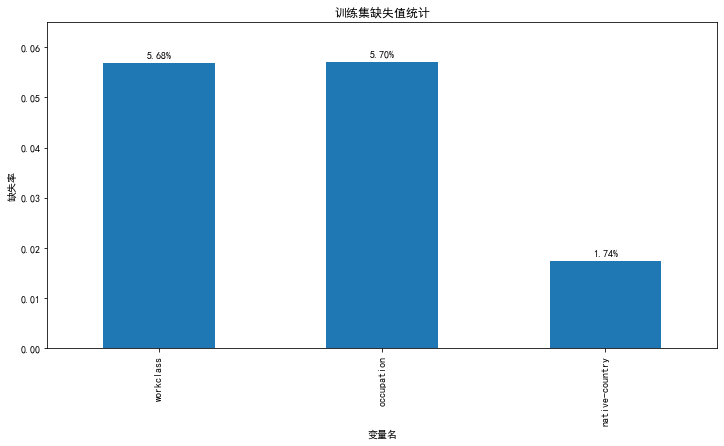

In [8]:
# 统计缺失率
missing = df_train.isnull().sum() / len(df_train)
plt.figure(figsize=(12,6))
missing[missing != 0].plot.bar()
plt.title('训练集缺失值统计')
plt.xlabel('变量名')
plt.ylabel('缺失率')
plt.ylim([0, 0.065])
# 添加数值显示
for x, y in enumerate(missing[missing != 0]):
    plt.text(x,y+0.001,'{:.2%}'.format(y),ha='center')
plt.show()

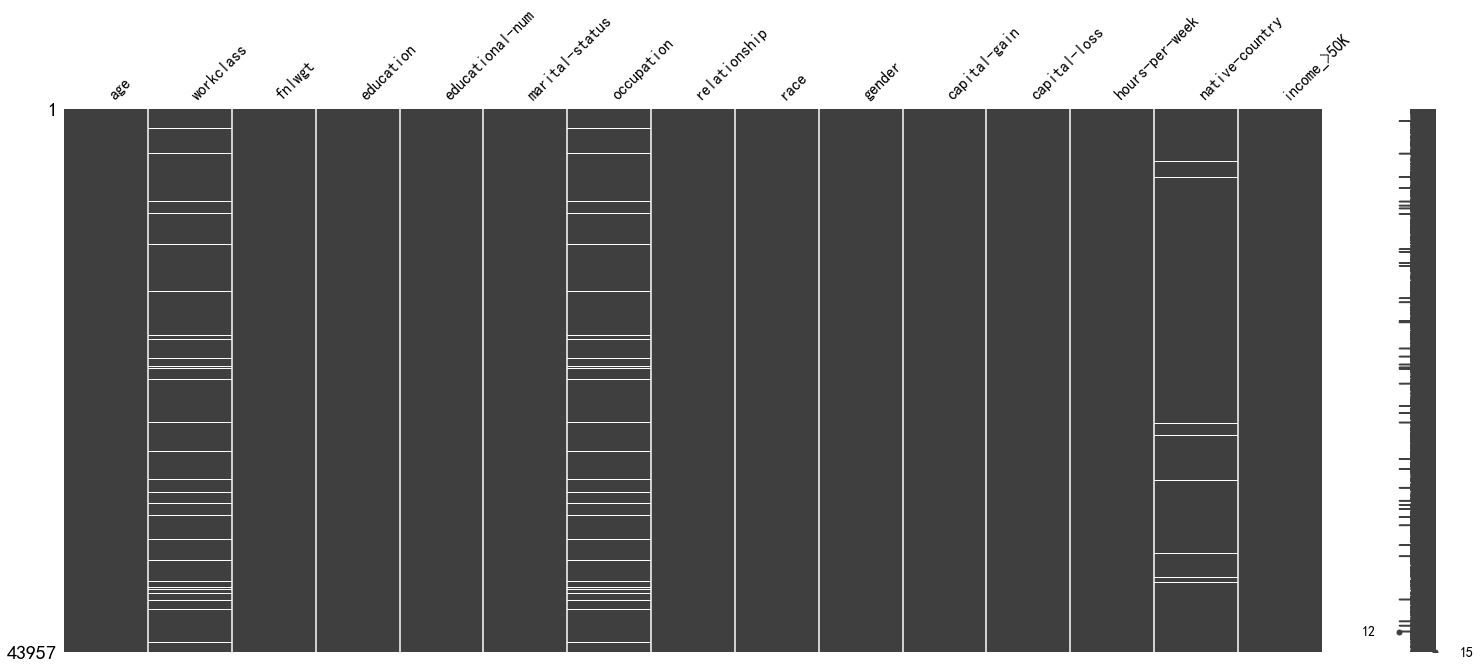

In [9]:
msno.matrix(df_train)
plt.show()

### 1.2.3唯一值查看

In [10]:
# 查看唯一值
[col for col in df_train.columns if df_train[col].nunique() <= 1]

[]

In [11]:
[col for col in df_test.columns if df_test[col].nunique() <= 1]

[]

# 2.数据可视化分析

## 2.1单一变量分析

### 2.1.1探索标签分布

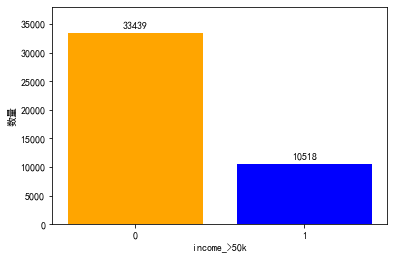

In [12]:
# 探索标签的分布
isDeafault_1 = (df_train['income_>50K'] == 1).sum()
isDeafault_0 = (df_train['income_>50K'] == 0).sum()
plt.bar([0,1], [isDeafault_0, isDeafault_1], color=['orange','b'])
plt.xticks([0,1], ['0', '1'])  
plt.xlabel("income_>50k") 
plt.ylabel('数量')
plt.ylim([0, 38000])
# 添加数值显示
for x, y in enumerate([isDeafault_0, isDeafault_1]):
    plt.text(x,y+800,'{:}'.format(y),ha='center')

### 2.1.2 探索特征整体分布

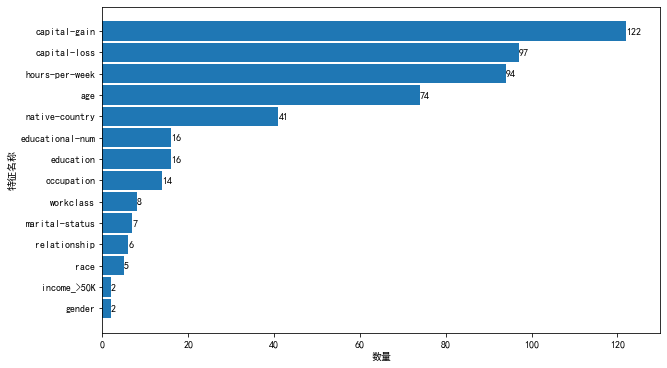

In [13]:
# 探索特征取值的数量
# del df_train['isDefault']
# del df_train['fnlwgt']
dic = {}
cols = df_train.columns
cols = cols.drop('fnlwgt')
for i in range(len(cols)):
    col = cols[i]
    nums = df_train[col].drop_duplicates().count()
    dic[col] = nums
res = sorted(dic.items(), key=operator.itemgetter(1))
k = []
v = []
for i in range(len(res)):
    k.append(res[i][0])
    v.append(res[i][1])
plt.figure(figsize=(10,6))
b = plt.barh(k, v, height=0.9)
plt.xlim([0, 130])
plt.xlabel("数量") 
plt.ylabel('特征名称')
for rect in b:
    w=rect.get_width()
    plt.text(w,rect.get_y()+rect.get_height()/2,'%d'%w,ha='left',va='center')

In [14]:
# 筛选数值型特征
numerical_fea = list(df_train.select_dtypes(exclude=['object']).columns)
# 筛选分类型变量
category_fea = list(filter(lambda x: x not in numerical_fea,list(df_train.columns)))

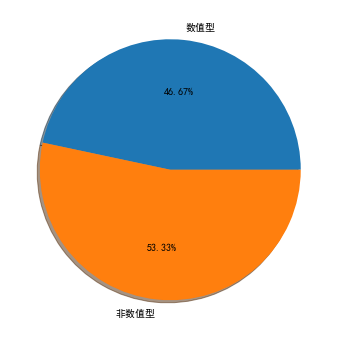

In [15]:
numer = len(numerical_fea)
categ = len(category_fea)
plt.figure(figsize=(6,6))
plt.pie(x=[numer, categ],labels=['数值型', '非数值型'],autopct='%3.2f%%',shadow=True)
plt.show()

### 2.1.3探索部分分类型变量

#### 探索workclass

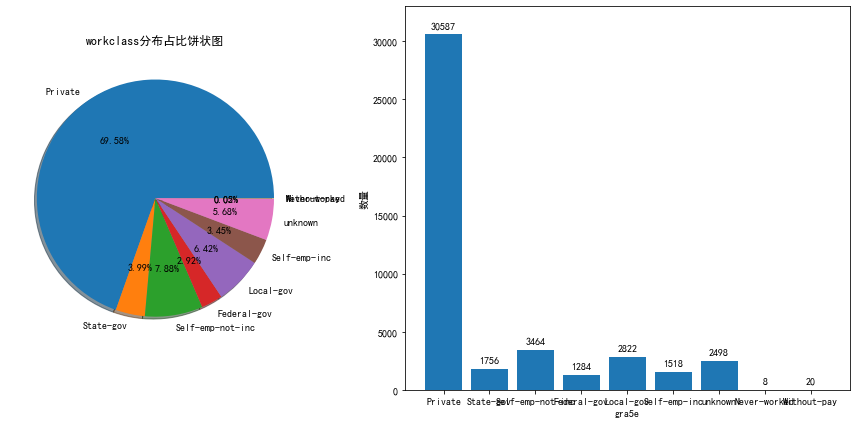

In [16]:
df_train["workclass"] = df_train["workclass"].fillna('unknown')
# 探索workclass的数量分布
g = df_train["workclass"].drop_duplicates().values
g_cnt = [len(df_train[df_train['workclass']==g[i]]) for i in range(len(g))]

fig = plt.figure(figsize=(12, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 3]) 
ax0 = plt.subplot(gs[0])
plt.title('workclass分布占比饼状图')
ax0.pie(x=g_cnt,labels=g,autopct='%3.2f%%',shadow=True)
ax1 = plt.subplot(gs[1])
ax1.bar(g.tolist(), g_cnt)
plt.ylim([0, 33000])
plt.xlabel("gra5e") 
plt.ylabel('数量')
for x, y in enumerate(g_cnt):
    plt.text(x,y+500,'{:}'.format(y),ha='center')
plt.tight_layout()

#### 探索education

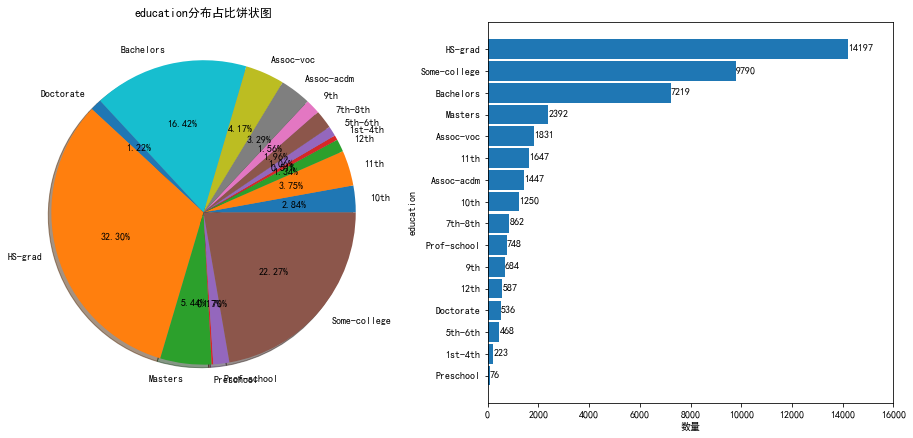

In [17]:
g = np.sort(df_train["education"].drop_duplicates().values)
g_cnt = [len(df_train[df_train['education']==g[i]]) for i in range(len(g))]

plt.figure(figsize=(16,7))
plt.subplot(1, 2, 1)
plt.title('education分布占比饼状图')
plt.pie(x=g_cnt,labels=g,autopct='%3.2f%%',shadow=True)
plt.subplot(1, 2, 2)
dic = {}
g = np.sort(df_train["education"].drop_duplicates().values)
g_cnt = [len(df_train[df_train['education']==g[i]]) for i in range(len(g))]
for i in range(len(g)):
    col = g[i]
    dic[col] = g_cnt[i]
res = sorted(dic.items(), key=operator.itemgetter(1))
k = []
v = []
for i in range(len(res)):
    k.append(res[i][0])
    v.append(res[i][1])
b = plt.barh(k, v, height=0.9)
plt.xlim([0, 16000])
plt.xlabel("数量") 
plt.ylabel('education')
for rect in b:
    w=rect.get_width()
    plt.text(w,rect.get_y()+rect.get_height()/1.8,'%d'%w,ha='left',va='center')

#### 探索occupation

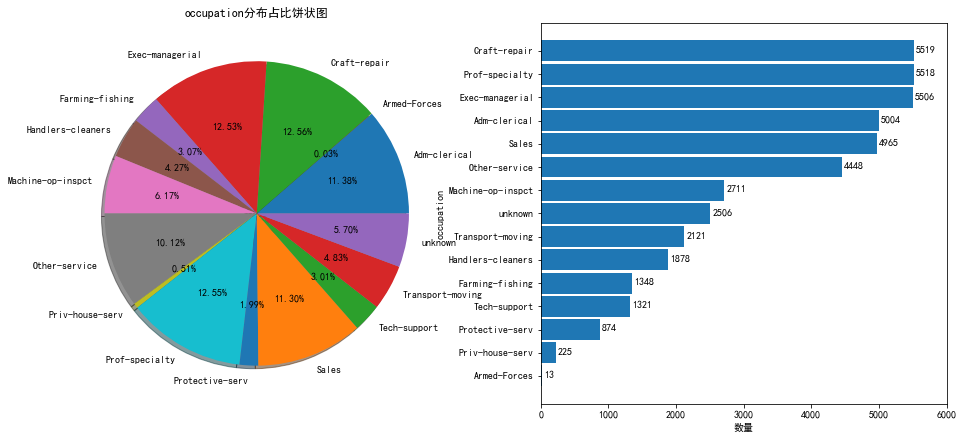

In [18]:
df_train["occupation"] = df_train["occupation"].fillna('unknown')
g = np.sort(df_train["occupation"].drop_duplicates().values)
g_cnt = [len(df_train[df_train['occupation']==g[i]]) for i in range(len(g))]

plt.figure(figsize=(16,7))
plt.subplot(1, 2, 1)
plt.title('occupation分布占比饼状图')
plt.pie(x=g_cnt,labels=g,autopct='%3.2f%%',shadow=True)
plt.subplot(1, 2, 2)
dic = {}
g = np.sort(df_train["occupation"].drop_duplicates().values)
g_cnt = [len(df_train[df_train['occupation']==g[i]]) for i in range(len(g))]
for i in range(len(g)):
    col = g[i]
    dic[col] = g_cnt[i]
res = sorted(dic.items(), key=operator.itemgetter(1))
k = []
v = []
for i in range(len(res)):
    k.append(res[i][0])
    v.append(res[i][1])
b = plt.barh(k, v, height=0.9)
plt.xlim([0, 6000])
plt.xlabel("数量") 
plt.ylabel('occupation')
for rect in b:
    w=rect.get_width()
    plt.text(w+30,rect.get_y()+rect.get_height()/1.8,'%d'%w,ha='left',va='center')

### 2.1.4探索部分连续型变量

#### 探索age

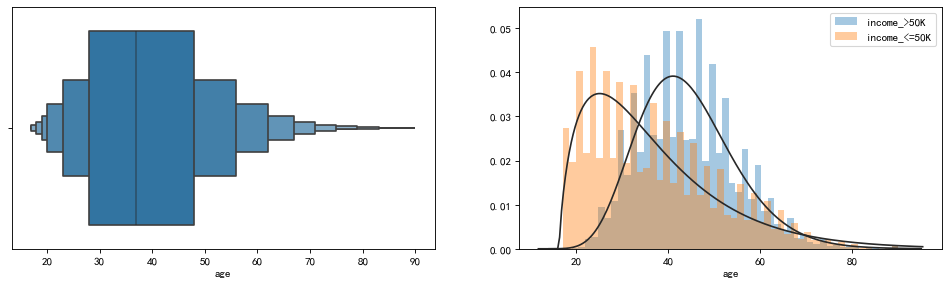

In [19]:
plt.figure(6, figsize=(15,4), dpi=80)
plt.subplot(1, 2, 1)
sns.boxenplot(x=df_train['age'])
plt.subplot(1, 2, 2)
sns.distplot(df_train.loc[df_train['income_>50K']==1]['age'], kde=False, fit=gamma, label="income_>50K")
sns.distplot(df_train.loc[df_train['income_>50K']==0]['age'], kde=False, fit=gamma, label="income_<=50K")
plt.legend()

#### 探索educational-num

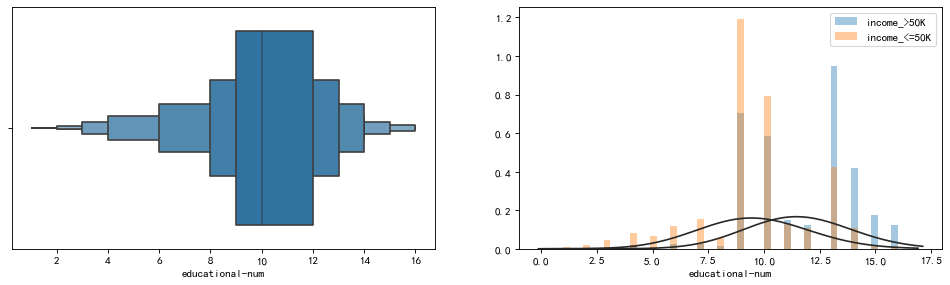

In [20]:
plt.figure(6, figsize=(15,4), dpi=80)
plt.subplot(1, 2, 1)
sns.boxenplot(x=df_train['educational-num'])
plt.subplot(1, 2, 2)
sns.distplot(df_train.loc[df_train['income_>50K']==1]['educational-num'], kde=False, fit=gamma, label="income_>50K")
sns.distplot(df_train.loc[df_train['income_>50K']==0]['educational-num'], kde=False, fit=gamma, label="income_<=50K")
plt.legend()

#### 探索hours-per-week

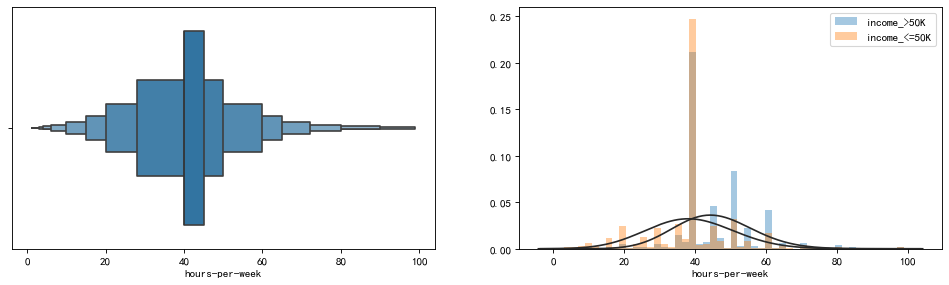

In [21]:
plt.figure(6, figsize=(15,4), dpi=80)
plt.subplot(1, 2, 1)
sns.boxenplot(x=df_train['hours-per-week'])
plt.subplot(1, 2, 2)
sns.distplot(df_train.loc[df_train['income_>50K']==1]['hours-per-week'], kde=False, fit=gamma, label="income_>50K")
sns.distplot(df_train.loc[df_train['income_>50K']==0]['hours-per-week'], kde=False, fit=gamma, label="income_<=50K")
plt.legend()

## 2.2双变量分析

### 2.2.1探索样本分布与收入大于50k占比

#### 探索workclass与收入大于50k占比

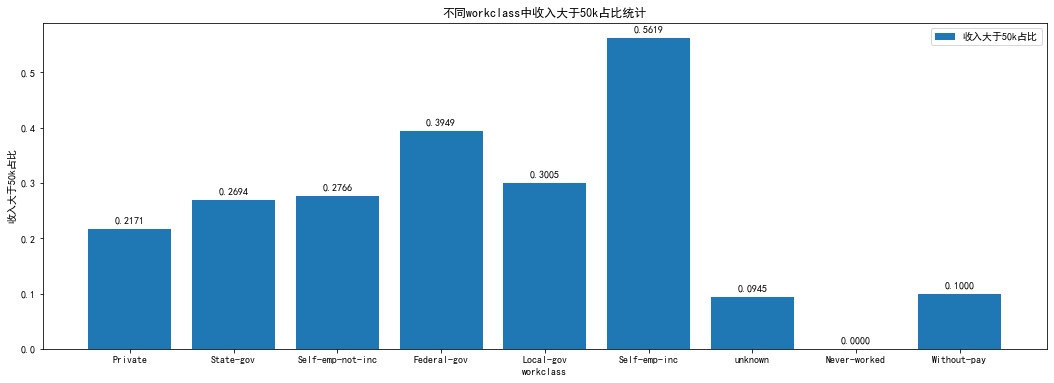

In [22]:
# 探索workclass与收入大于50k占比
sg = df_train["workclass"].drop_duplicates().values
sg_mr = [len(df_train[df_train['workclass']==sg[i]][df_train['income_>50K']==1])/len(df_train[df_train['workclass']==sg[i]]) for i in range(len(sg))]
plt.figure(figsize=(18,6))
plt.bar(sg, sg_mr, label="收入大于50k占比")
plt.legend()
plt.title('不同workclass中收入大于50k占比统计')
plt.xlabel('workclass')
plt.ylabel('收入大于50k占比')
for x, y in enumerate(sg_mr):
    plt.text(x,y+0.01,'{:.4f}'.format(y),ha='center')

#### 探索education与收入大于50k占比

In [23]:
df_train["education"].drop_duplicates().values

array(['Doctorate', '12th', 'Bachelors', '7th-8th', 'Some-college',
       'HS-grad', '9th', '10th', '11th', 'Masters', 'Preschool',
       '5th-6th', 'Prof-school', 'Assoc-voc', '1st-4th', 'Assoc-acdm'],
      dtype=object)

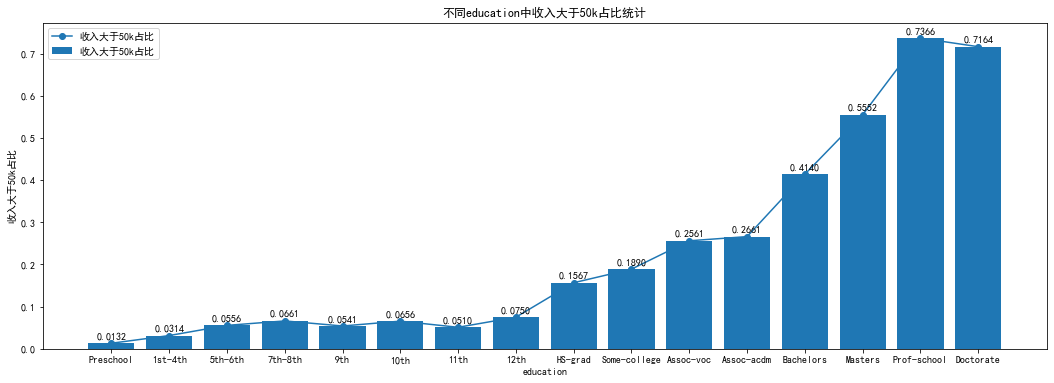

In [24]:
# 探索education与收入大于50k占比
sg = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 
      'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
sg_mr = [len(df_train[df_train['education']==sg[i]][df_train['income_>50K']==1])/len(df_train[df_train['education']==sg[i]]) for i in range(len(sg))]
plt.figure(figsize=(18,6))
plt.plot(sg, sg_mr, 'o-', label="收入大于50k占比")
plt.bar(sg, sg_mr, label="收入大于50k占比")
plt.legend()
plt.title('不同education中收入大于50k占比统计')
plt.xlabel('education')
plt.ylabel('收入大于50k占比')
for x, y in enumerate(sg_mr):
    plt.text(x,y+0.01,'{:.4f}'.format(y),ha='center')

#### 探索occupation与收入大于50k占比

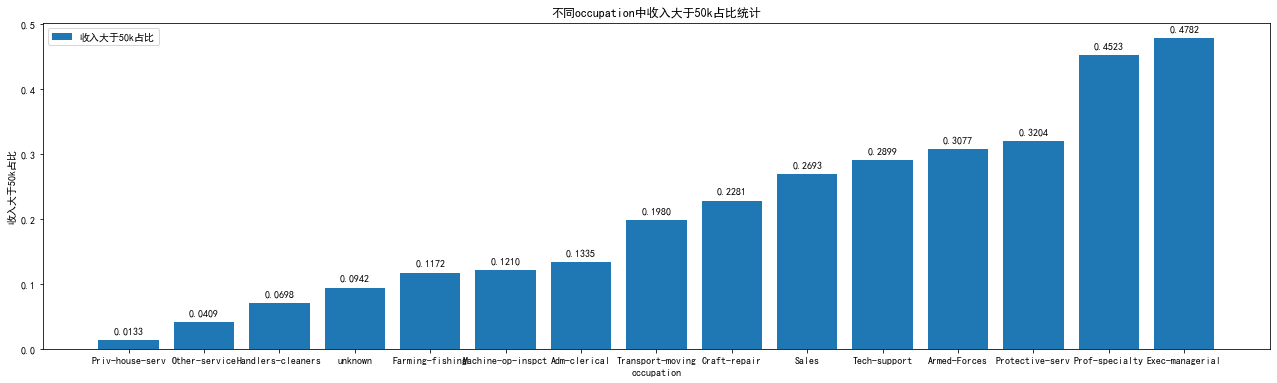

In [24]:
# 探索occupation与收入大于50k占比
sg = df_train["occupation"].drop_duplicates().values
sg_mr = [len(df_train[df_train['occupation']==sg[i]][df_train['income_>50K']==1])/len(df_train[df_train['occupation']==sg[i]]) for i in range(len(sg))]
dic = {}
for i in range(len(sg)):
    dic[sg[i]] = sg_mr[i]
res = sorted(dic.items(), key=operator.itemgetter(1))
sg = [res[i][0] for i in range(len(res))]
sg_mr = [res[i][1] for i in range(len(res))]
plt.figure(figsize=(22,6))
plt.bar(sg, sg_mr, label="收入大于50k占比")
plt.legend()
plt.title('不同occupation中收入大于50k占比统计')
plt.xlabel('occupation')
plt.ylabel('收入大于50k占比')
for x, y in enumerate(sg_mr):
    plt.text(x,y+0.01,'{:.4f}'.format(y),ha='center')

### 2.2.2相关性分析

<AxesSubplot:>

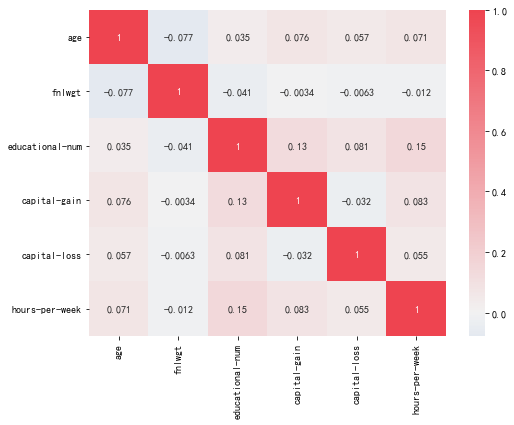

In [25]:
# 画相关系数热力图
corrmat = df_train[df_train.columns[df_train.columns != 'income_>50K']].corr()
plt.figure(figsize=(8,6))
cmap=sns.diverging_palette(250,10,s=80,l=55,n=9,as_cmap=True)
sns.heatmap(corrmat,annot=True,cmap=cmap,center=0)

### 2.2.3探索workclass与fnlwgt的数量分布

Text(0.5, 0, 'workclass')

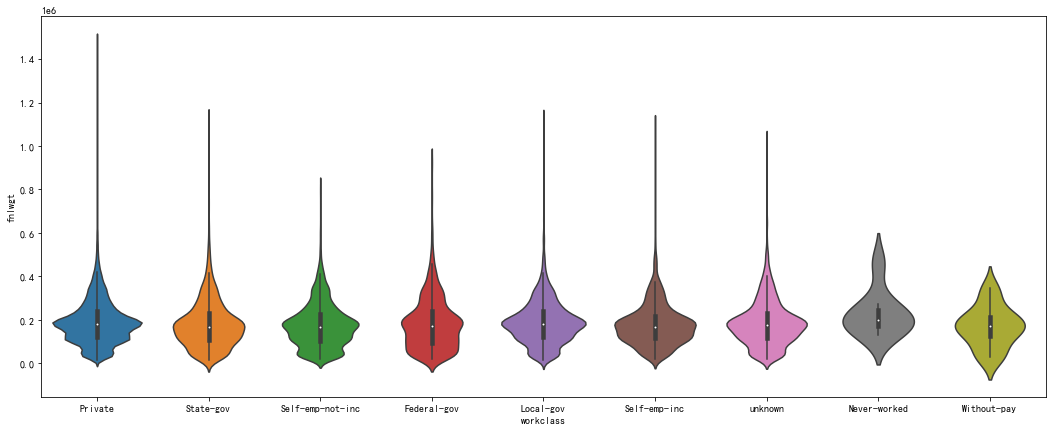

In [26]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = df_train['workclass'],y = df_train['fnlwgt'])
plt.ylabel("fnlwgt")
plt.xlabel("workclass")

## 2.3多变量分析

### 2.3.1探索CADD_PHRED、CADD_RAW与是否冲突

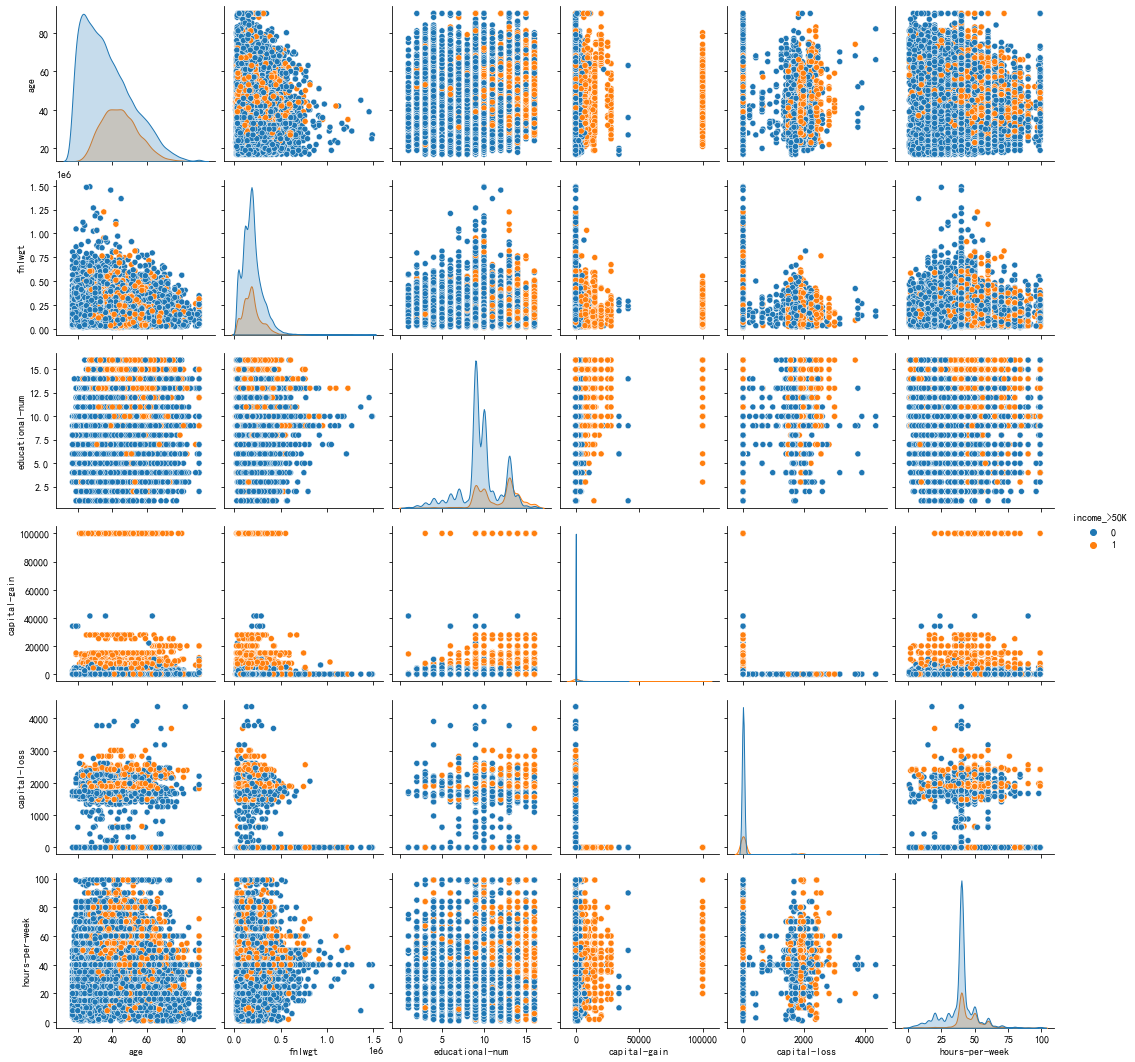

In [27]:
sns.pairplot(df_train,hue='income_>50K')

### 2.3.2探索educational-num、race与workclass

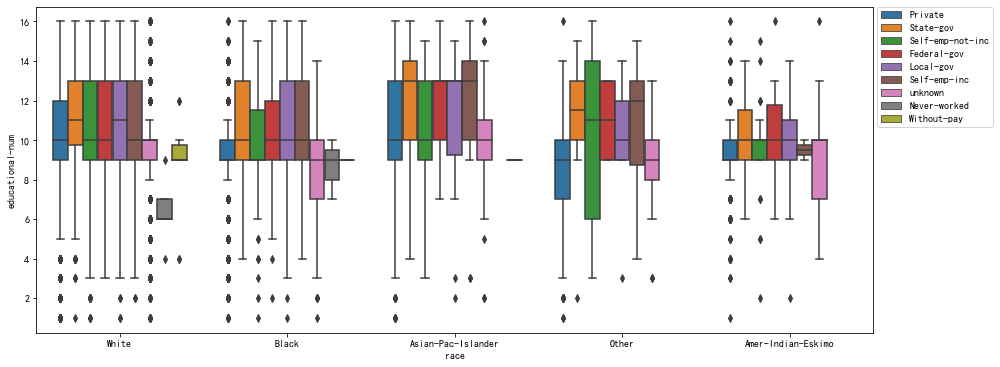

In [28]:
plt.figure(figsize=(15,6))
sns.boxplot(x='race',y='educational-num',data=df_train,hue='workclass')
plt.legend(bbox_to_anchor=(1.005,1), loc=2, borderaxespad=0.)

# 3.数据预处理

## 3.1处理缺失值

In [29]:
# 筛选数值型特征
numerical_fea = list(df_train.select_dtypes(exclude=['object']).columns)
# 筛选分类型变量
category_fea = list(filter(lambda x: x not in numerical_fea,list(df_train.columns)))
for i in range(len(category_fea)):
    if df_train[category_fea[i]].isnull().sum()/len(df_train) != 0:
        df_train[category_fea[i]] = df_train[category_fea[i]].fillna(df_train[category_fea[i]].mode()[0])
        df_test[category_fea[i]] = df_test[category_fea[i]].fillna(df_test[category_fea[i]].mode()[0])

## 3.2特征编码

In [30]:
for i in range(len(category_fea)):
    print(category_fea[i], '的种类数为：', df_train[category_fea[i]].drop_duplicates().count())

workclass 的种类数为： 9
education 的种类数为： 16
marital-status 的种类数为： 7
occupation 的种类数为： 15
relationship 的种类数为： 6
race 的种类数为： 5
gender 的种类数为： 2
native-country 的种类数为： 41


### 3.2.1顺序编码

In [31]:
# education顺序编码
dic = {'Preschool':1, '1st-4th':2, '5th-6th':3, '7th-8th':4, '9th':5, '10th':6, '11th':7, '12th':8, 'HS-grad':9, 
      'Some-college':10, 'Assoc-voc':11, 'Assoc-acdm':12, 'Bachelors':13, 'Masters':14, 'Prof-school':15, 'Doctorate':16}
df_train['education'] = df_train['education'].apply(lambda x : dic[x])
df_test['education'] = df_test['education'].apply(lambda x : dic[x])

In [32]:
print((df_train['education'] != df_train['educational-num']).sum())
print((df_test['education'] != df_test['educational-num']).sum())

0
0


In [33]:
df_train = df_train.drop(['educational-num'], axis=1)
df_test = df_test.drop(['educational-num'], axis=1)

### 3.2.2均值编码

In [34]:
# 高基数无序特征均值编码
mean_fea = ['occupation','native-country']
for i in range(len(mean_fea)):
    means = df_train.groupby(mean_fea[i])['income_>50K'].mean()
    df_train[mean_fea[i]] = df_train[mean_fea[i]].map(means)
    df_test[mean_fea[i]] = df_test[mean_fea[i]].map(means)

### 3.2.3独热编码

In [35]:
# 特征独热编码
onehot_fea = ['workclass', 'marital-status', 'relationship', 'race']
df_train = pd.get_dummies(df_train, columns = onehot_fea)
df_test = pd.get_dummies(df_test, columns = onehot_fea)
df_test['workclass_Never-worked'] = [0 for i in range(len(df_test))] #为了与训练集保持一致，添加一列
df_test['workclass_Without-pay'] = [0 for i in range(len(df_test))] #为了与训练集保持一致，添加一列
df_test['workclass_unknown'] = [0 for i in range(len(df_test))] #为了与训练集保持一致，添加一列

In [36]:
df_train['gender'].drop_duplicates().values

array(['Male', 'Female'], dtype=object)

In [37]:
dic = {'Male':0, 'Female':1}
df_train['gender'] = df_train['gender'].apply(lambda x : dic[x])
df_test['gender'] = df_test['gender'].apply(lambda x : dic[x])

## 3.3异常值处理

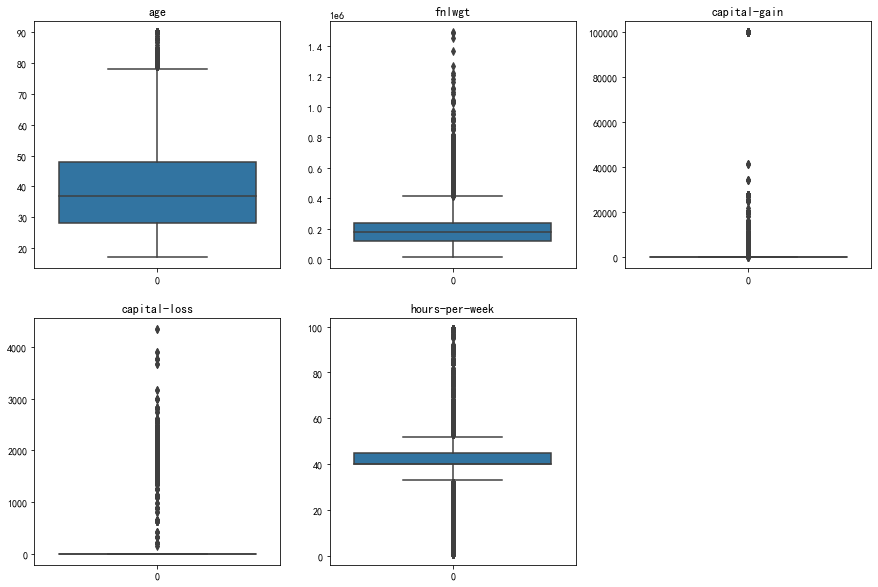

In [38]:
numerical_fea.remove('income_>50K')
numerical_fea.remove('educational-num')
plt.figure(3, figsize=(15,10))
for i in range(len(numerical_fea)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df_train[numerical_fea[i]])
    plt.title(numerical_fea[i])
plt.show()

In [39]:
df_train['capital-gain'].drop_duplicates().values

array([99999,     0,  2653,  4386,  6849,  5178, 15024,  4416,  2964,
        2829,  2176,  5013,   594,  2174,  3137,  7688,  1086,  3674,
       14344,  4865,  7298,  9386, 27828,  7978,  3471, 14084,  1797,
        6497, 10520,  2414,  2580,  3103,  4650,  3942,  3325,  2354,
        2597, 13550,  2407,  4931, 20051,  4787,  1455,  1831,  5060,
        2202,  1173,  6418,  2105,  4101,  8614,  4064,  3411,  4508,
        3464,  2885, 25124,  7443,  3908,   914,  9562,  6514,  3887,
        2050,  2463,  3418,  5455,   114,   991,  2290,  2907, 15831,
        1151,  2036,  2961, 10605,  2329,  1506,  2977, 34095,  7430,
        1055,  2993, 22040,   401,  6612,  2936,  6723,  2538, 10566,
        1848, 41310,  2346,  2228,  6767,  1471, 15020, 25236,  3781,
        2009,  3273,  5721,  3432,  3818,  4934,  2635,  1424,  5556,
        2062,  4687,  6360,  1409,  6097,  1264, 11678,  1639, 18481,
        7896,  3456,  7262,  1111,  1731], dtype=int64)

In [40]:
(df_train['capital-gain'] == 99999).sum()

228

In [41]:
df_train = df_train.drop(df_train[df_train['capital-gain'] == 99999].index.to_list())
df_train.shape

(43729, 37)

## 3.7样本重采样

In [42]:
# 对标签为0的样本进行欠采样
idx_0 = df_train[df_train['income_>50K'] == 0].index.values
idx_1 = df_train[df_train['income_>50K'] == 1].index.values
random.shuffle(idx_0)
df_train = df_train.drop(idx_0[0:int((len(idx_0)-len(idx_1))/2)])

# 4.特征工程

## 4.1特征构造

In [43]:
df_train['capital-remain'] = df_train['capital-gain'] - df_train['capital-loss']
df_test['capital-remain'] = df_test['capital-gain'] - df_test['capital-loss']

## 4.2特征降维

In [44]:
Y = df_train['income_>50K']
X = df_train.drop(['income_>50K'], axis=1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=666)

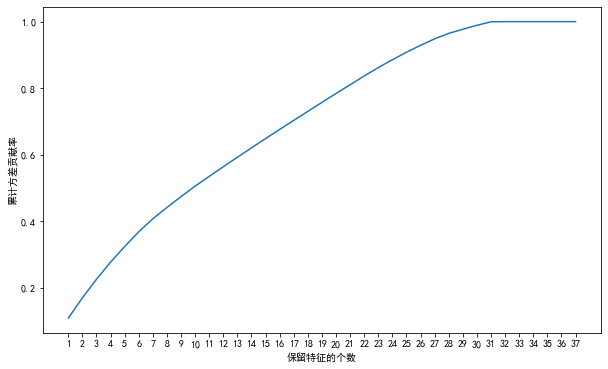

In [45]:
ss = StandardScaler()
ss = ss.fit(Xtrain)
Xtrain = ss.transform(Xtrain)
Xtest = ss.transform(Xtest)
pca_line = PCA().fit(Xtrain)
plt.figure(figsize=(10,6))
plt.plot([i+1 for i in range(37)],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([i+1 for i in range(37)])
plt.xlabel("保留特征的个数")
plt.ylabel("累计方差贡献率")
plt.show()

In [46]:
# 找到可以解释97%的pca
pca = PCA(n_components=0.97,svd_solver="full")
txa = pca.fit(Xtrain).transform(Xtrain)
Xtest = pca.fit(Xtrain).transform(Xtest)
Xtrain = pd.DataFrame(txa)
Xtest = pd.DataFrame(Xtest)
print(Xtrain.shape)
print(Xtest.shape)

(22508, 29)
(9647, 29)


In [47]:
# 压缩数据，否则占用内存过多，运行失败
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2    
    print("转换前的占用的内存为：", start_mem, "MB")
    for col in df.columns:
        df[col] = df[col].astype(np.float16)
    end_mem = df.memory_usage().sum() / 1024**2
    print("转换后的占用的内存为：", end_mem, "MB")
    print('压缩率为：{:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df
Xtrain = reduce_mem_usage(Xtrain)

转换前的占用的内存为： 4.980072021484375 MB
转换后的占用的内存为： 1.2451095581054688 MB
压缩率为：75.0%


In [48]:
#恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest, df_train, df_test]:
    i.index = range(i.shape[0])

In [50]:
Xtrain.to_csv("Xtrain.csv", index=0)
Xtest.to_csv("Xtest.csv", index=0)
Ytrain.to_csv("Ytrain.csv", index=0)
Ytest.to_csv("Ytest.csv", index=0)
df_train.to_csv("df_train.csv", index=0)
df_test.to_csv("df_test.csv", index=0)

In [2]:
Xtrain = pd.read_csv("Xtrain.csv")
Xtest = pd.read_csv("Xtest.csv")
Ytrain = pd.read_csv("Ytrain.csv")
Ytest = pd.read_csv("Ytest.csv")
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

# 5.模型构建与调参

## 5.1随机森林

### 5.1.1模型调参

#### 调n_estimators 

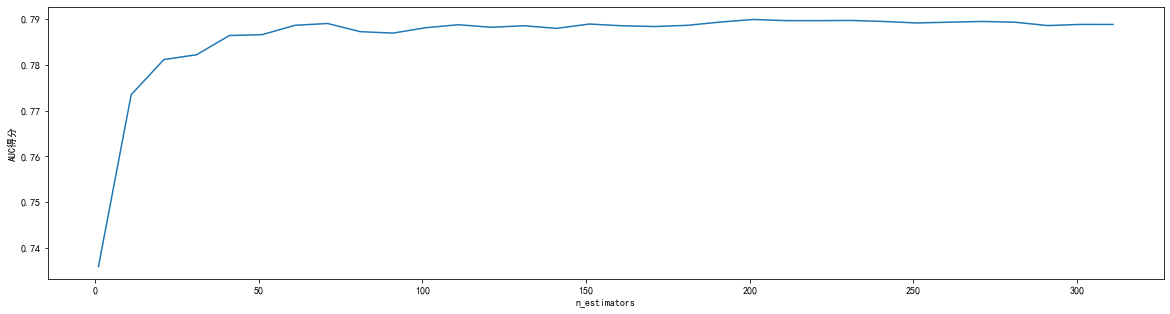

最高得分为： 0.78985083904515
此时的n_estimators为： 201


In [230]:
scorel = []
for i in range(1,320,10):
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=100).fit(Xtrain,Ytrain)
    score = roc_auc_score(Ytest, rfc.predict(Xtest))
    scorel.append(score)
plt.figure(figsize=[20,5])
plt.xlabel('n_estimators')
plt.ylabel('AUC得分')
plt.plot(range(1,320,10),scorel)
plt.show()
print("最高得分为：", max(scorel))
print("此时的n_estimators为：", scorel.index(max(scorel))*10+1)

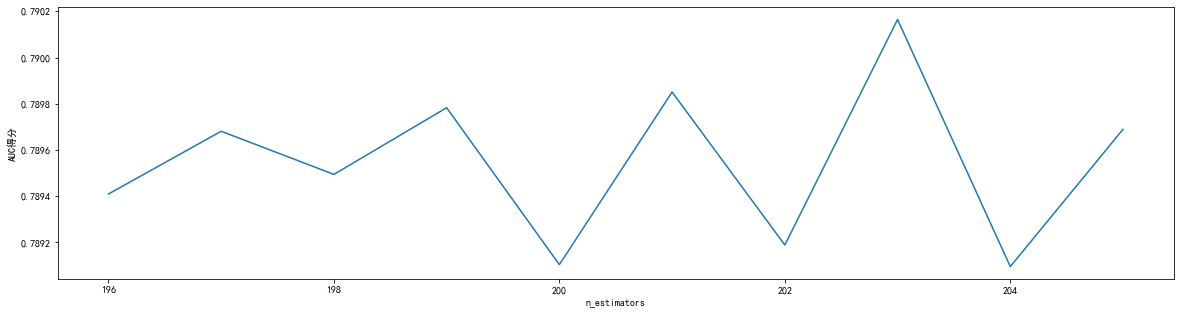

最高得分为： 0.7901648424027297
此时的n_estimators为： 203


In [232]:
scorel1 = []
for i in range(196,206,1):
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=100).fit(Xtrain,Ytrain)
    score = roc_auc_score(Ytest, rfc.predict(Xtest))
    scorel1.append(score)
plt.figure(figsize=[20,5])
plt.xlabel('n_estimators')
plt.ylabel('AUC得分')
plt.plot(range(196,206,1),scorel1)
plt.show()
print("最高得分为：", max(scorel1))
print("此时的n_estimators为：", scorel1.index(max(scorel1))+196)

#### 调max_depth

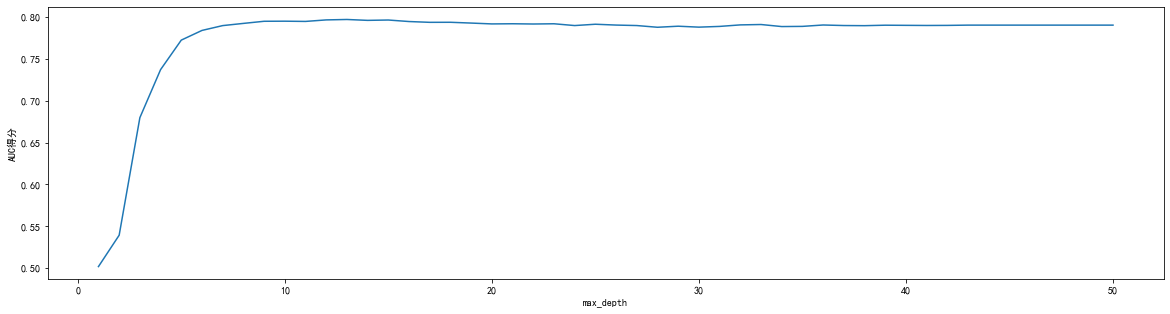

最高得分为： 0.7969032046963946
此时的max_depth为： 13


In [242]:
scorel3 = []
for i in range(1,51,1):
    rfc = RandomForestClassifier(n_estimators=203, n_jobs=-1, random_state=100, max_depth=i).fit(Xtrain,Ytrain)
    score = roc_auc_score(Ytest, rfc.predict(Xtest))
    scorel3.append(score)
plt.figure(figsize=[20,5])
plt.xlabel('max_depth')
plt.ylabel('AUC得分')
plt.plot(range(1,51,1),scorel3)
plt.show()
print("最高得分为：", max(scorel3))
print("此时的max_depth为：", scorel3.index(max(scorel3))+1)

#### 调min_samples_leaf

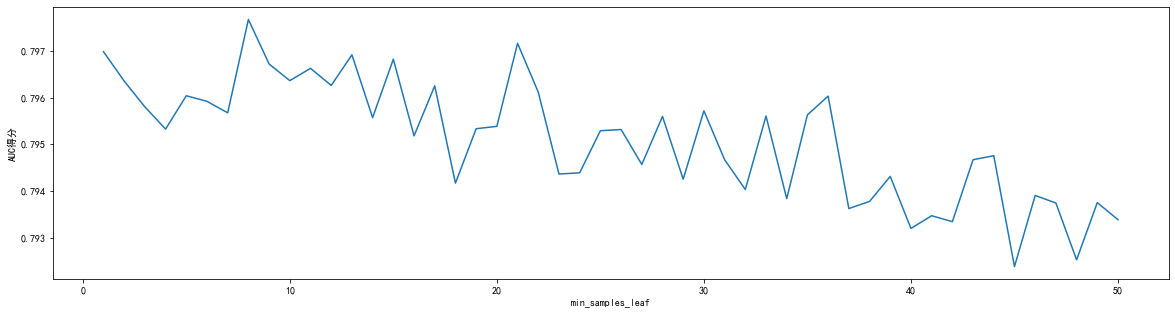

最高得分为： 0.7977434124568591
此时的min_samples_leaf为： 8


In [62]:
scorel5 = []
for i in range(1,51,1):
    rfc = RandomForestClassifier(n_estimators=203, n_jobs=-1, random_state=100, max_depth=13, min_samples_leaf=i).fit(Xtrain,Ytrain)
    score = roc_auc_score(Ytest, rfc.predict(Xtest))
    scorel5.append(score)
plt.figure(figsize=[20,5])
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC得分')
plt.plot(range(1,51,1),scorel5)
plt.show()
print("最高得分为：", max(scorel5))
print("此时的min_samples_leaf为：", scorel5.index(max(scorel5))+1)

#### 调max_features

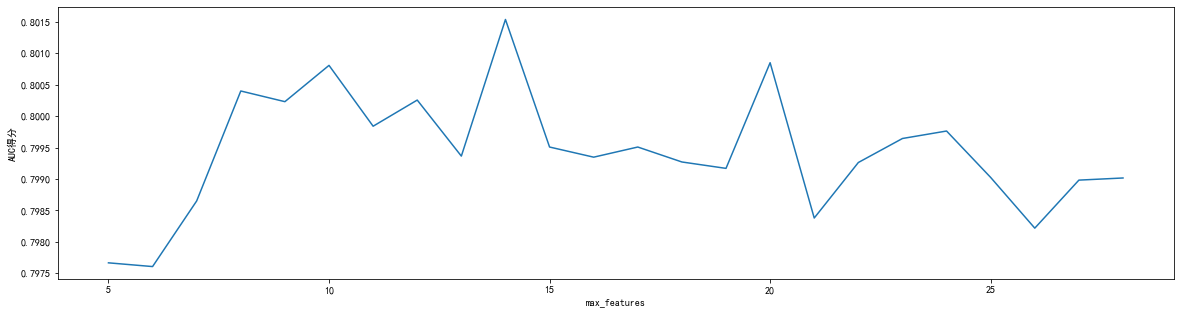

最高得分为： 0.8012226228630506
此时的max_features为： 14


In [63]:
scorel6 = []
for i in range(5,29,1):
    rfc = RandomForestClassifier(n_estimators=203, n_jobs=-1, random_state=100, 
                                 max_depth=13, min_samples_leaf=8, max_features=i).fit(Xtrain,Ytrain)
    score = roc_auc_score(Ytest, rfc.predict(Xtest))
    scorel6.append(score)
plt.figure(figsize=[20,5])
plt.xlabel('max_features')
plt.ylabel('AUC得分')
plt.plot(range(5,29,1),scorel6)
plt.show()
print("最高得分为：", max(scorel6))
print("此时的max_features为：", scorel6.index(max(scorel6))+5)

#### 调criterion

In [77]:
rfc = RandomForestClassifier(criterion='entropy', n_estimators=203, n_jobs=-1, random_state=100, 
                             max_depth=26, min_samples_leaf=8, max_features=14)
roc_auc_score(Ytest, rfc.fit(Xtrain,Ytrain).predict(Xtest))

0.8015619123449028


### 5.1.2模型评估

In [3]:
RFC = RandomForestClassifier(criterion='entropy', n_estimators=203, n_jobs=-1, random_state=100, 
                             max_depth=26, min_samples_leaf=8, max_features=14)
RFC.fit(Xtrain, Ytrain)

RandomForestClassifier(criterion='entropy', max_depth=26, max_features=14,
                       min_samples_leaf=8, n_estimators=203, n_jobs=-1,
                       random_state=100)

In [3]:
RFC = RandomForestClassifier(criterion='entropy', n_estimators=203, n_jobs=-1, random_state=100, 
                             max_depth=26, min_samples_leaf=8, max_features=14)
RFC.fit(Xtrain, Ytrain)
predictions=RFC.predict(Xtest)
print('随机森林模型评估')
print("Accuracy:", accuracy_score(Ytest,predictions))
print("F1 Score:", f1_score(Ytest,predictions, average='weighted'))
print(classification_report(Ytest, predictions))

随机森林模型评估
Accuracy: 0.8315538509381155
F1 Score: 0.8296541209981128
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      6546
           1       0.76      0.70      0.73      3101

    accuracy                           0.83      9647
   macro avg       0.81      0.80      0.80      9647
weighted avg       0.83      0.83      0.83      9647



Text(53.0, 0.5, '真实值')

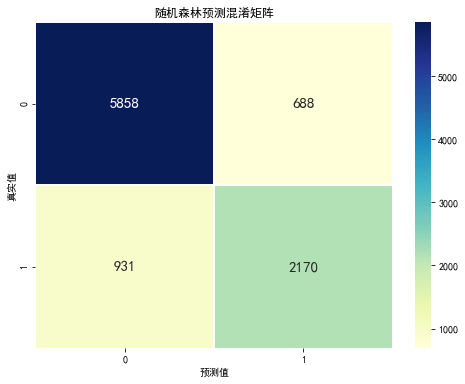

In [253]:
# 绘制混淆矩阵
f, ax = plt.subplots(figsize=(8,6))
C = confusion_matrix(Ytest, predictions, labels=[0, 1])
sns.heatmap(C, annot=True, fmt='.0f',ax=ax, linewidths=.5, cmap="YlGnBu",annot_kws={'size':15}) #画热力图
ax.set_title('随机森林预测混淆矩阵') #标题
ax.set_xlabel('预测值') #x轴
ax.set_ylabel('真实值') #y轴

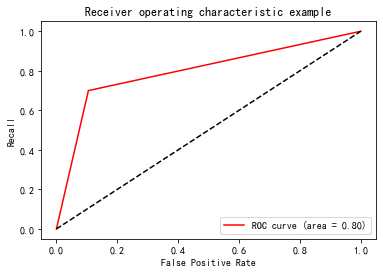

In [261]:
FPR, Recall, thresholds = ROC(Ytest,RFC.predict(Xtest),pos_label=1)
area = roc_auc_score(Ytest,RFC.predict(Xtest))
plt.figure()
plt.plot(FPR, Recall, color='red',label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 5.2逻辑回归

### 5.2.1模型调参

#### 调penalty、C

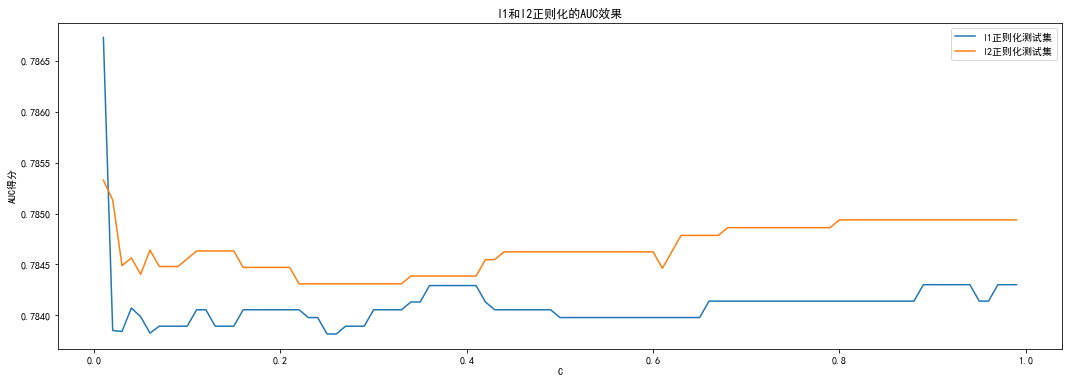

In [4]:
c = np.arange(0.01, 1, 0.01)
test1 = []
test2 = []
for i in range(len(c)):
    LR1 = LogisticRegression(penalty= 'l1', C= c[i], solver = 'liblinear', random_state = 100)
    LR2 = LogisticRegression(penalty= 'l2', C= c[i], solver = 'liblinear', random_state = 100)
    LR1.fit(Xtrain, Ytrain)
    LR2.fit(Xtrain, Ytrain)
    test1.append(roc_auc_score(Ytest, LR1.predict(Xtest)))
    test2.append(roc_auc_score(Ytest, LR2.predict(Xtest)))
plt.figure(figsize = (18, 6))
plt.plot(c, test1, label= "l1正则化测试集",)
plt.plot(c, test2, label= "l2正则化测试集")
plt.title("l1和l2正则化的AUC效果")
plt.xlabel('C')
plt.ylabel('AUC得分')
plt.legend()
plt.show()

In [5]:
print('得分最高为：', max(enumerate(test2), key=lambda x: x[-1])[1])
print('此时的C为：', c[max(enumerate(test2), key=lambda x: x[-1])[0]])

得分最高为： 0.7853281857276163
此时的C为： 0.01


#### 调solver

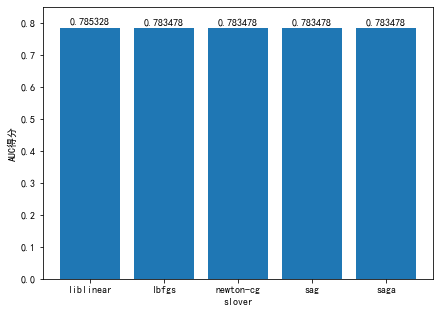

In [6]:
slovers = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
scores = []  
for i in range(5):
    LR = LogisticRegression(C= 0.01, solver = slovers[i], random_state = 100).fit(Xtrain, Ytrain)
    scores.append(roc_auc_score(Ytest, LR.predict(Xtest)))
plt.figure(figsize = (7, 5))
plt.bar([0,1,2,3,4], scores)  
plt.xticks([0,1,2,3,4], slovers)  
plt.xlabel("slover")  
plt.ylabel("AUC得分")  
plt.ylim(ymax = 0.85)
for x, y in enumerate(scores):
    plt.text(x,y+0.01,'{:.6f}'.format(y),ha='center')

#### class_weight

In [7]:
arr = [None, 'balanced']
best = 0
sc_max = 0
for i in range(99):
    arr.append({0:np.arange(0.01, 1, 0.01)[i], 1:(1-np.arange(0.01, 1, 0.01)[i])})
for i in range(101):
    LR = LogisticRegression(C= 0.01, solver = 'liblinear',random_state = 100, class_weight = arr[i]).fit(Xtrain, Ytrain)
    score = roc_auc_score(Ytest, LR.predict(Xtest))
    if score > sc_max:
        sc_max = score
        best = arr[i]
print('最高AUC为：', sc_max, '此时的class_weight为：', best)

最高AUC为： 0.8226621454912438 此时的class_weight为： {0: 0.3, 1: 0.7}


### 5.2.2模型评估

In [4]:
LR = LogisticRegression(C= 0.01, solver = 'liblinear', random_state = 100, class_weight = {0: 0.3, 1: 0.7})
LR.fit(Xtrain, Ytrain)
#评估模型准确性
predictions=LR.predict(Xtest)
print('逻辑回归模型评估')
print("Accuracy:", accuracy_score(Ytest,predictions))
print("F1 Score:", f1_score(Ytest,predictions, average='weighted'))
print(classification_report(Ytest, predictions))

逻辑回归模型评估
Accuracy: 0.8047061262568674
F1 Score: 0.8104491667013253
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      6546
           1       0.64      0.87      0.74      3101

    accuracy                           0.80      9647
   macro avg       0.79      0.82      0.79      9647
weighted avg       0.84      0.80      0.81      9647



Text(53.0, 0.5, '真实值')

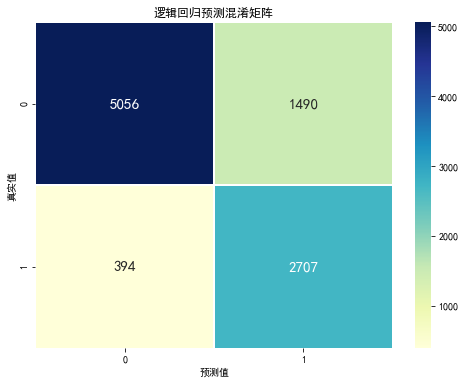

In [15]:
# 绘制混淆矩阵
f, ax = plt.subplots(figsize=(8,6))
C = confusion_matrix(Ytest, predictions, labels=[0, 1])
sns.heatmap(C, annot=True, fmt='.0f',ax=ax, linewidths=.5, cmap="YlGnBu",annot_kws={'size':15}) #画热力图
ax.set_title('逻辑回归预测混淆矩阵') #标题
ax.set_xlabel('预测值') #x轴
ax.set_ylabel('真实值') #y轴

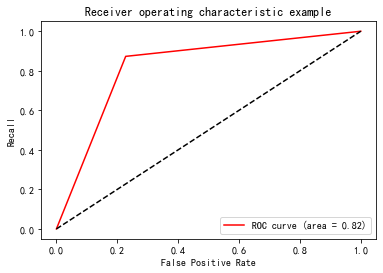

In [20]:
FPR, Recall, thresholds = ROC(Ytest,LR.predict(Xtest),pos_label=1)
area = roc_auc_score(Ytest,LR.predict(Xtest))
plt.figure()
plt.plot(FPR, Recall, color='red',label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 5.3支持向量机

### 5.3.1模型调参

In [22]:
Ytrain = Ytrain.iloc[:,0].ravel()
Ytest = Ytest.iloc[:,0].ravel()

#### 调kernel

In [25]:
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,cache_size = 15000
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("当kernel为", kernel, "时：")
    print("accuracy：", score, "recall为：", recall, "auc为：", auc, "平均得分为：", (score+recall+auc)/3.0)

当kernel为 linear 时：
accuracy： 0.8248160049756401 recall为： 0.6472105772331506 auc为： 0.903716786903252 平均得分为： 0.7919144563706809
当kernel为 poly 时：
accuracy： 0.8245050274696797 recall为： 0.6452757175104805 auc为： 0.9036790020624513 平均得分为： 0.7911532490142039
当kernel为 rbf 时：
accuracy： 0.8302062817456204 recall为： 0.673653660109642 auc为： 0.8910277309203056 平均得分为： 0.7982958909251895
当kernel为 sigmoid 时：
accuracy： 0.7647973463252825 recall为： 0.617220251531764 auc为： 0.7971637328979259 平均得分为： 0.7263937769183241


#### 调class_weight

In [ ]:
aus = []
irange = np.linspace(0.01,0.7,20)
for i in irange:
    print(i)
    clf = SVC(kernel = "linear",cache_size = 15000,class_weight = {1:1+i}).fit(Xtrain, Ytrain)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    aus.append(auc)
plt.figure(figsize = (18, 6))
plt.plot(irange+1, aus)
plt.xlabel('标签为1的样本所占的权重')
plt.ylabel('score')
plt.show()
print('得分最高为：', max(aus), '此时的gamma为：', irange[aus.index(max(aus))]+1)

0.01
0.04631578947368421
0.08263157894736842
0.11894736842105262
0.15526315789473685
0.19157894736842107
0.22789473684210526
0.2642105263157895
0.3005263157894737
0.3368421052631579
0.37315789473684213
0.4094736842105263
0.4457894736842105
0.48210526315789476
0.518421052631579
0.5547368421052632
0.5910526315789474
0.6273684210526316
0.6636842105263158
0.7


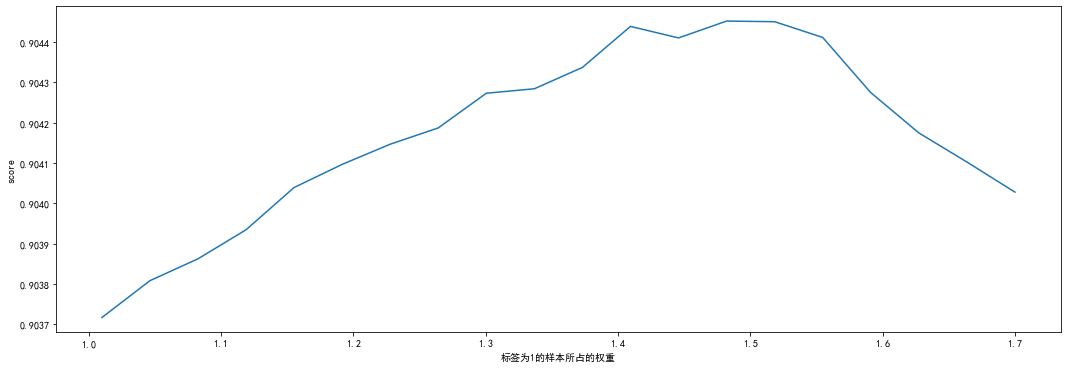

得分最高为： 0.9044517439305082 此时的标签为1的权重为： 1.4821052631578948


In [3]:
aus = []
irange = np.linspace(0.01,0.7,20)
for i in irange:
    print(i)
    clf = SVC(kernel = "linear",cache_size = 15000,class_weight = {1:1+i}).fit(Xtrain, Ytrain)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    aus.append(auc)
plt.figure(figsize = (18, 6))
plt.plot(irange+1, aus)
plt.xlabel('标签为1的样本所占的权重')
plt.ylabel('score')
plt.show()
print('得分最高为：', 0.9044517439305082, '此时的标签为1的权重为：', 1.4821052631578948)

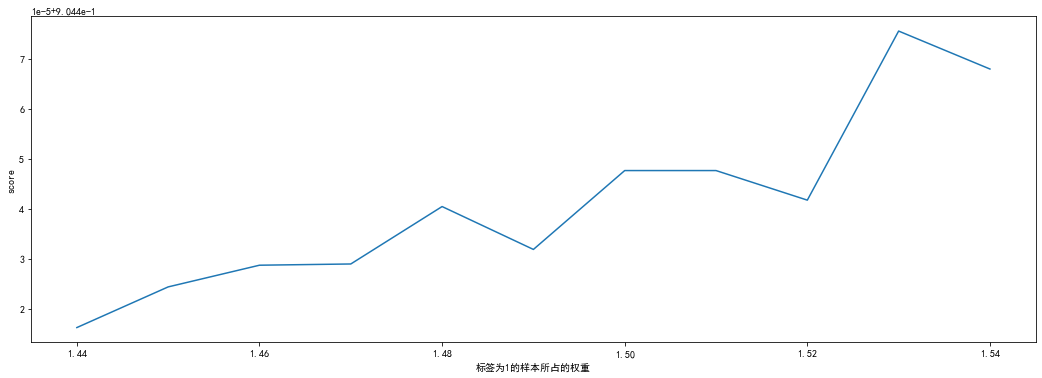

得分最高为： 0.9044754887717937 此时的标签为1的权重为： 1.53


In [56]:
aus = []
irange = np.linspace(0.44, 0.54, 11)
for i in irange:
    clf = SVC(kernel = "linear",cache_size = 15000,class_weight = {1:1+i}).fit(Xtrain, Ytrain)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    aus.append(auc)
plt.figure(figsize = (18, 6))
plt.plot(irange+1, aus)
plt.xlabel('标签为1的样本所占的权重')
plt.ylabel('score')
plt.show()
print('得分最高为：', max(aus), '此时的标签为1的权重为：', irange[aus.index(max(aus))]+1)

#### 调C

0.01
under C 0.010000, testing accuracy is 0.823676,recall is 0.773299', auc is 0.904282
1.0621052631578947
under C 1.062105, testing accuracy is 0.823054,recall is 0.772654', auc is 0.904473
2.114210526315789
under C 2.114211, testing accuracy is 0.823261,recall is 0.775556', auc is 0.904510
3.1663157894736838
under C 3.166316, testing accuracy is 0.823572,recall is 0.775234', auc is 0.904490
4.218421052631578
under C 4.218421, testing accuracy is 0.823365,recall is 0.775556', auc is 0.904479
5.270526315789473
under C 5.270526, testing accuracy is 0.823572,recall is 0.775879', auc is 0.904446
6.322631578947368
under C 6.322632, testing accuracy is 0.823676,recall is 0.777169', auc is 0.904416
7.374736842105262
under C 7.374737, testing accuracy is 0.823468,recall is 0.776846', auc is 0.904420
8.426842105263157
under C 8.426842, testing accuracy is 0.823883,recall is 0.777169', auc is 0.904412
9.478947368421052
under C 9.478947, testing accuracy is 0.823883,recall is 0.776846', auc is 

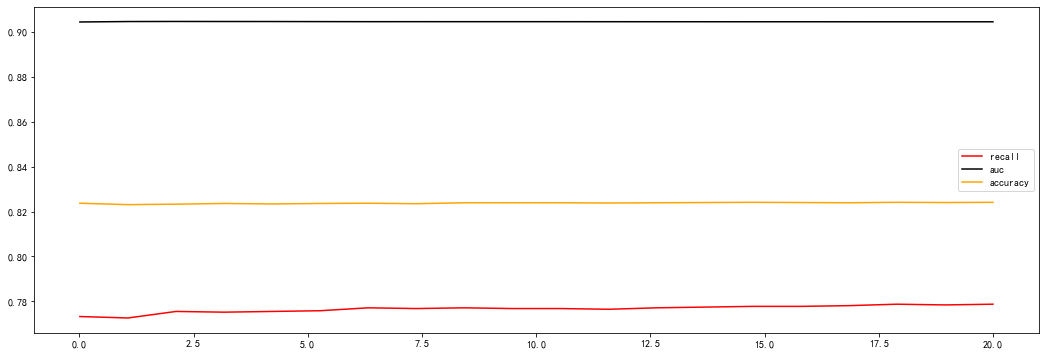

recallall得分最高为： 0.7787810383747178 此时的C为： 17.89578947368421
aucall得分最高为： 0.9045095788758798 此时的C为： 2.114210526315789
scoreall得分最高为： 0.8240903907950659 此时的C为： 14.739473684210525


In [59]:
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)
recallall = []
aucall = []
scoreall = []
for C in C_range:
    print(C)
    clf = SVC(kernel = "linear",C=C,cache_size = 15000,class_weight = {1:1.53}).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" % (C,score,recall,auc))
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure(figsize = (18, 6))
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend()
plt.show()
print('recallall得分最高为：', max(recallall), '此时的C为：', C_range[recallall.index(max(recallall))])
print('aucall得分最高为：', max(aucall), '此时的C为：', C_range[aucall.index(max(aucall))])
print('scoreall得分最高为：', max(scoreall), '此时的C为：', C_range[scoreall.index(max(scoreall))])

### 5.3.2模型评估

In [5]:
svc = SVC(kernel = "linear",C=2.114210526315789,cache_size = 15000,class_weight = {1:1.53}, probability=True).fit(Xtrain, Ytrain)
ppre = svc.predict(Xtest)
print('SVC模型分类报告')
print("Accuracy:", accuracy_score(Ytest,ppre))
print("F1 Score:", f1_score(Ytest,ppre, average='weighted'))
print(classification_report(Ytest, ppre))

SVC模型分类报告
Accuracy: 0.8232611174458381
F1 Score: 0.825342188485317
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      6546
           1       0.70      0.78      0.74      3101

    accuracy                           0.82      9647
   macro avg       0.80      0.81      0.80      9647
weighted avg       0.83      0.82      0.83      9647



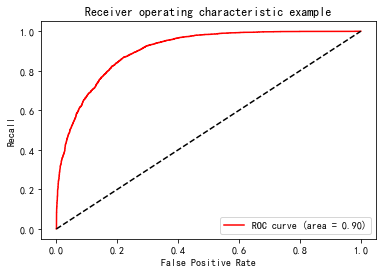

In [61]:
FPR, Recall, thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label=1)
area = roc_auc_score(Ytest,clf.decision_function(Xtest))
plt.figure()
plt.plot(FPR, Recall, color='red',label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(53.0, 0.5, '真实值')

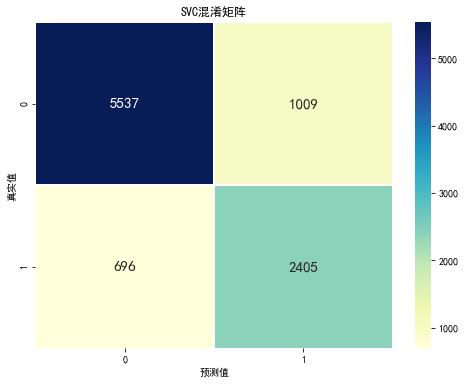

In [62]:
f, ax = plt.subplots(figsize=(8,6))
C = confusion_matrix(Ytest, ppre, labels=[0, 1])
sns.heatmap(C, annot=True, fmt='.0f',ax=ax, linewidths=.5, cmap="YlGnBu",annot_kws={'size':15})
ax.set_title('SVC混淆矩阵')
ax.set_xlabel('预测值')
ax.set_ylabel('真实值')

## 5.4朴素贝叶斯

### 5.4.1模型调参

In [9]:
XXtrain = Xtrain.copy(deep=True)
XXtest = Xtest.copy(deep=True)
YYtrain = Ytrain.copy()
YYtest = Ytest.copy()

#### 高斯朴素贝叶斯

In [7]:
gnb = GaussianNB().fit(Xtrain, Ytrain)
proba = gnb.predict_proba(Xtest)[:,1]
print("AUC得分为：",AUC(Ytest,proba))

AUC得分为： 0.8470693791748678


#### 多项式贝叶斯

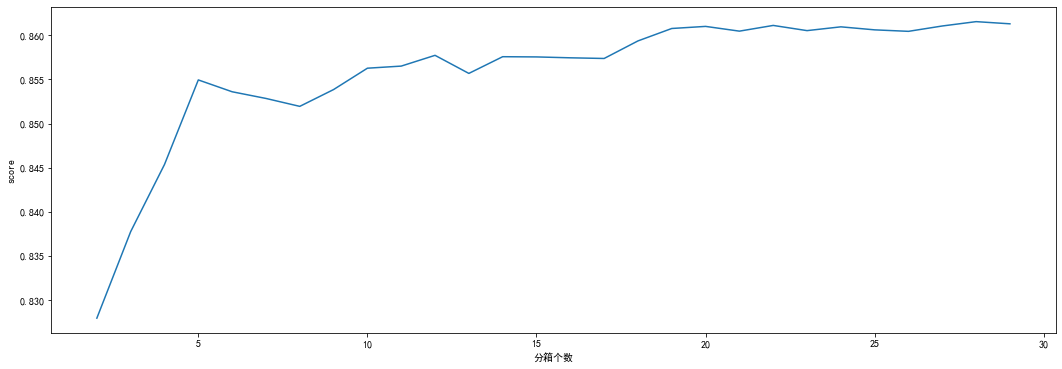

最高AUC得分为： 0.8615420323593908 此时的分箱个数为： 28


In [98]:
scores = []
for i in range(2, 30):
    kbs = KBinsDiscretizer(n_bins=i, encode='onehot').fit(Xtrain)
    mnb = MultinomialNB().fit(kbs.transform(Xtrain), Ytrain)
    score = AUC(Ytest, mnb.predict_proba(kbs.transform(Xtest))[:,1])
    scores.append(score)
plt.figure(figsize = (18, 6))
plt.plot(range(2, 30), scores)
plt.xlabel('分箱个数')
plt.ylabel('score')
plt.show()
print('最高AUC得分为：', max(scores), '此时的分箱个数为：', range(2, 30)[scores.index(max(scores))])

#### 伯努利朴素贝叶斯

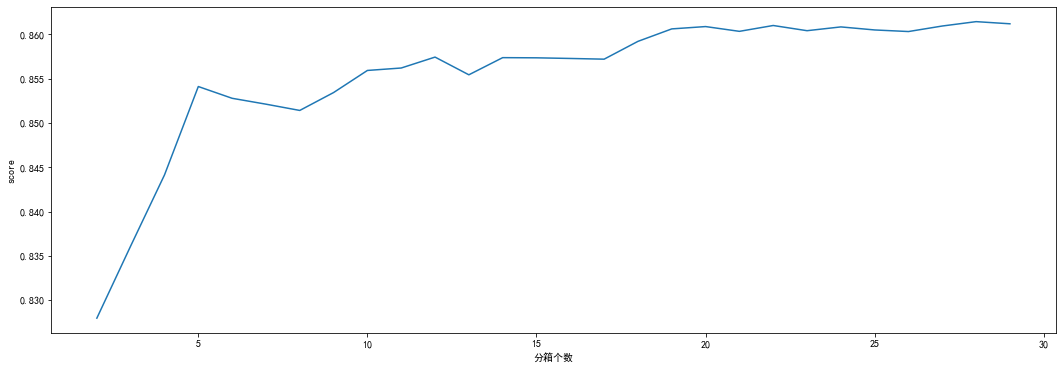

最高AUC得分为： 0.861445279520626 此时的分箱个数为： 28


In [99]:
scores = []
for i in range(2, 30):
    kbs = KBinsDiscretizer(n_bins=i, encode='onehot').fit(Xtrain)
    bnb = BernoulliNB().fit(kbs.transform(Xtrain), Ytrain)
    score = AUC(Ytest, bnb.predict_proba(kbs.transform(Xtest))[:,1])
    scores.append(score)
plt.figure(figsize = (18, 6))
plt.plot(range(2, 30), scores)
plt.xlabel('分箱个数')
plt.ylabel('score')
plt.show()
print('最高AUC得分为：', max(scores), '此时的分箱个数为：', range(2, 30)[scores.index(max(scores))])

#### 补集朴素贝叶斯

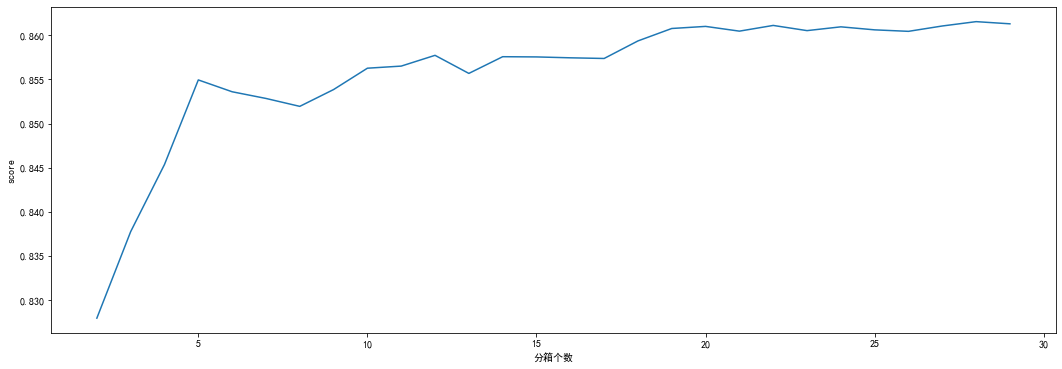

最高得分为： 0.8615420323593908 此时的分箱个数为： 28


In [100]:
scores = []
for i in range(2, 30):
    kbs = KBinsDiscretizer(n_bins=i, encode='onehot').fit(Xtrain)
    cnb = ComplementNB().fit(kbs.transform(Xtrain), Ytrain)
    score = AUC(Ytest, cnb.predict_proba(kbs.transform(Xtest))[:,1])
    scores.append(score)
plt.figure(figsize = (18, 6))
plt.plot(range(2, 30), scores)
plt.xlabel('分箱个数')
plt.ylabel('score')
plt.show()
print('最高得分为：', max(scores), '此时的分箱个数为：', range(2, 30)[scores.index(max(scores))])

In [10]:
name = ["Multinomial","Gaussian","Bernoulli","Complement"]
models = [MultinomialNB(),GaussianNB(),BernoulliNB(),ComplementNB()]
for name,clf in zip(name,models):
    Xtrain = XXtrain.copy(deep=True)
    Ytrain = YYtrain.copy()
    Xtest = XXtest.copy(deep=True)
    Ytest = YYtest.copy()
    if name != "Gaussian":
        kbs = KBinsDiscretizer(n_bins=28, encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)
    clf.fit(Xtrain,Ytrain)
    proba = clf.predict_proba(Xtest)[:,1]
    print(name, ":", AUC(Ytest,proba))

Multinomial : 0.8615420323593908
Gaussian : 0.8470693791748678
Bernoulli : 0.861445279520626
Complement : 0.8615420323593908


In [13]:
name = ["Multinomial","Multinomial + Isotonic","Multinomial + Sigmoid"]
models = [MultinomialNB(),
          CalibratedClassifierCV(MultinomialNB(), cv=10, method='isotonic'),
          CalibratedClassifierCV(MultinomialNB(), cv=10, method='sigmoid')]
for name,clf in zip(name,models):
    Xtrain = XXtrain.copy(deep=True)
    Ytrain = YYtrain.copy()
    Xtest = XXtest.copy(deep=True)
    Ytest = YYtest.copy()
    kbs = KBinsDiscretizer(n_bins=28, encode='onehot').fit(Xtrain)
    Xtrain = kbs.transform(Xtrain)
    Xtest = kbs.transform(Xtest)
    clf.fit(Xtrain,Ytrain)
    proba = clf.predict_proba(Xtest)[:,1]
    print(name, ":", AUC(Ytest,proba))

Multinomial : 0.8615420323593908
Multinomial + Isotonic : 0.8616878513017248
Multinomial + Sigmoid : 0.8615193220443855


In [14]:
name = ["Complement","Complement + Isotonic","Complement + Sigmoid"]
models = [ComplementNB(),
          CalibratedClassifierCV(ComplementNB(), cv=10, method='isotonic'),
          CalibratedClassifierCV(ComplementNB(), cv=10, method='sigmoid')]
for name,clf in zip(name,models):
    Xtrain = XXtrain.copy(deep=True)
    Ytrain = YYtrain.copy()
    Xtest = XXtest.copy(deep=True)
    Ytest = YYtest.copy()
    kbs = KBinsDiscretizer(n_bins=28, encode='onehot').fit(Xtrain)
    Xtrain = kbs.transform(Xtrain)
    Xtest = kbs.transform(Xtest)
    clf.fit(Xtrain,Ytrain)
    proba = clf.predict_proba(Xtest)[:,1]
    print(name, ":", AUC(Ytest,proba))

Complement : 0.8615420323593908
Complement + Isotonic : 0.8616878513017248
Complement + Sigmoid : 0.8615174500444499


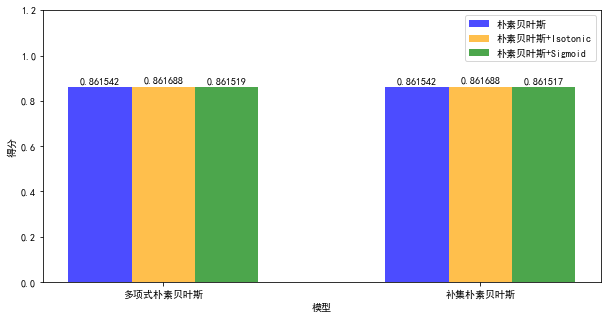

In [26]:
plt.figure(figsize = (10, 5))
x = np.arange(2)
y0 = [0.8615420323593908, 0.8615420323593908]
y1 = [0.8616878513017248, 0.8616878513017248]
y2 = [0.8615193220443855, 0.8615174500444499]
bar_width = 0.2
tick_label = ["多项式朴素贝叶斯", "补集朴素贝叶斯"]
plt.bar(x, y0, bar_width, align="center", color="blue", label="朴素贝叶斯", alpha=0.7)
plt.bar(x+bar_width, y1, bar_width, color="orange", align="center", label="朴素贝叶斯+Isotonic", alpha=0.7)
plt.bar(x+bar_width*2, y2, bar_width, color="green", align="center", label="朴素贝叶斯+Sigmoid", alpha=0.7)
plt.xlabel("模型")
plt.ylabel("得分")
plt.xticks(x+bar_width*1, tick_label)
plt.ylim(ymax = 1.2)
plt.legend()
for x, y in enumerate(y0):
    plt.text(x,y+0.015,'{:.6f}'.format(y),ha='center')
for x, y in enumerate(y1):
    plt.text(x+bar_width,y+0.015,'{:.6f}'.format(y),ha='center')
for x, y in enumerate(y2):
    plt.text(x+bar_width*2,y+0.015,'{:.6f}'.format(y),ha='center')
plt.show()

### 5.4.2模型评估

In [28]:
kbs = KBinsDiscretizer(n_bins=28, encode='onehot').fit(XXtrain)
Xtrain = XXtrain.copy(deep=True)
Xtest = XXtest.copy(deep=True)
Xtrain = kbs.transform(Xtrain)
Xtest = kbs.transform(Xtest)
CCC = CalibratedClassifierCV(ComplementNB(), cv=10, method='isotonic').fit(Xtrain,Ytrain)
ppre = CCC.predict(Xtest)
print('经isotonic校准之后的补集朴素贝叶斯分类报告')
print("Accuracy:", accuracy_score(Ytest,ppre))
print("F1 Score:", f1_score(Ytest,ppre, average='weighted'))
print(classification_report(Ytest, ppre))

经isotonic校准之后的补集朴素贝叶斯分类报告
Accuracy: 0.7879133409350056
F1 Score: 0.7852294595178921
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      6546
           1       0.69      0.63      0.66      3101

    accuracy                           0.79      9647
   macro avg       0.76      0.75      0.75      9647
weighted avg       0.78      0.79      0.79      9647



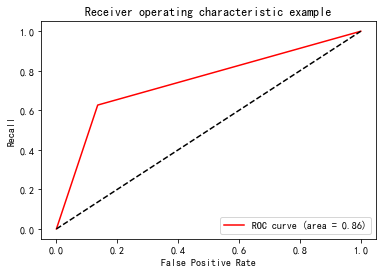

In [29]:
FPR, Recall, thresholds = ROC(Ytest,CCC.predict(Xtest),pos_label=1)
area = AUC(Ytest,CCC.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(FPR, Recall, color='red',label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(53.0, 0.5, '真实值')

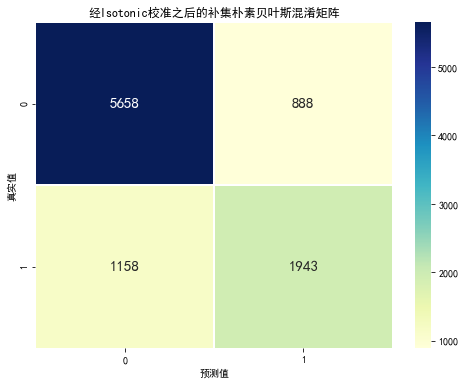

In [31]:
f, ax = plt.subplots(figsize=(8,6))
C = confusion_matrix(Ytest, ppre, labels=[0, 1])
sns.heatmap(C, annot=True, fmt='.0f',ax=ax, linewidths=.5, cmap="YlGnBu",annot_kws={'size':15})
ax.set_title('经Isotonic校准之后的补集朴素贝叶斯混淆矩阵')
ax.set_xlabel('预测值')
ax.set_ylabel('真实值')

## 5.5XGBoost

### 5.5.1初始模型评估

In [51]:
def cv_score_train_test(model):
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
    score_list = ["accuracy","f1", "roc_auc"]
    train_scores = []
    test_scores = []
    for score in score_list:
        train_scores.append(cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring=score).mean())
        test_scores.append(cross_val_score(model, Xtest, Ytest, cv=kfold, scoring=score).mean())
    scores = np.array((train_scores + test_scores)).reshape(2, -1)
    scores_df = pd.DataFrame(scores, index=['Train', 'Test'], columns=score_list)
    print(scores_df)

In [52]:
#未进行调参时的模型
xgb_clf1 = XGBClassifier(seed=27)
xgb_clf1.fit(Xtrain, Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=27,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [53]:
y_pred_origin = xgb_clf1.predict(Xtest)
y_pre_origin = [round(value) for value in y_pred_origin]

print('XGBoost分类报告')
print("Accuracy:", accuracy_score(Ytest,y_pre_origin))
print("F1 Score:", f1_score(Ytest,y_pre_origin, average='weighted'))
print(classification_report(Ytest, y_pre_origin))

XGBoost分类报告
Accuracy: 0.8323831242873432
F1 Score: 0.8311232774600825
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6542
           1       0.75      0.71      0.73      3105

    accuracy                           0.83      9647
   macro avg       0.81      0.80      0.81      9647
weighted avg       0.83      0.83      0.83      9647



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

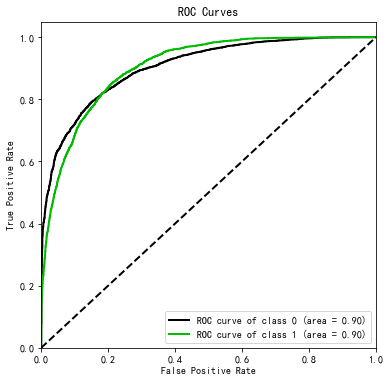

In [54]:
vali_proba_df = pd.DataFrame(xgb_clf1.predict_proba(Xtest))
skplt.metrics.plot_roc(Ytest, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

In [55]:
# 查看此时的模型效果
cv_score_train_test(xgb_clf1)

       accuracy        f1   roc_auc
Train  0.820997  0.713674  0.898978
Test   0.822329  0.718385  0.898547


### 5.5.2模型调参

#### 调n_estimators，初步调learning_rate

In [56]:
#其他参数设置为默认值
model1_1 = XGBClassifier(objective= 'binary:logistic',nthread=4,seed=27)
#网格搜索参数列表
learning_rate = [0.001, 0.01, 0.1, 0.2]
n_estimators = [100, 200, 300, 500, 1000, 1500]
param1 = dict(learning_rate=learning_rate, n_estimators=n_estimators)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

#网格搜索类，要求的param_grid参数，必须是字典，或者字典构成的列表

grid_search = GridSearchCV(model1_1, param_grid=param1, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(Xtrain, Ytrain)

print("最高得分: %f 参数 %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
最高得分: 0.907441 参数 {'learning_rate': 0.01, 'n_estimators': 1000}


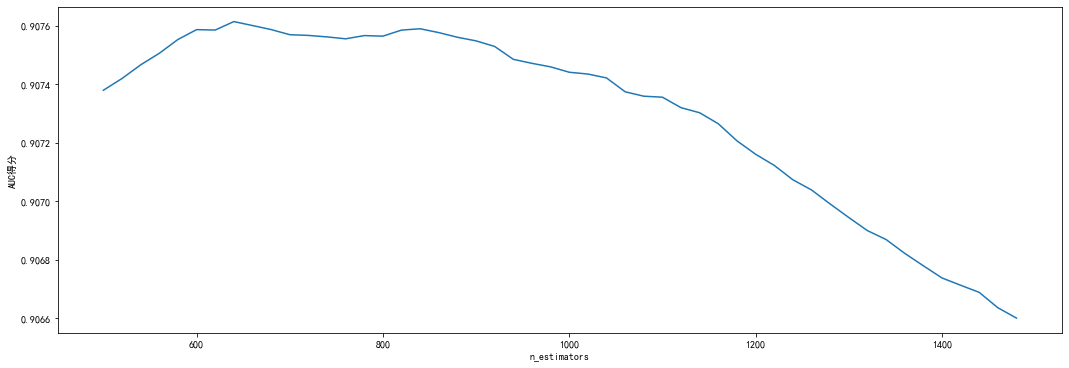

得分最高为： 0.9076143591564513 此时的n_estimators为： 640


In [57]:
axisx = range(500,1500,20)
rs = []
for i in axisx:
    reg = XGBClassifier(objective= 'binary:logistic',nthread=4,seed=27,learning_rate=0.01,n_estimators=i)
    rs.append(cross_val_score(reg,Xtrain,Ytrain,cv=kfold,scoring="roc_auc").mean())
plt.figure(figsize = (18, 6))
plt.plot(range(500,1500,20), rs)
plt.xlabel('n_estimators')
plt.ylabel('AUC得分')
plt.show()
print('得分最高为：', max(rs), '此时的n_estimators为：', axisx[rs.index(max(rs))])

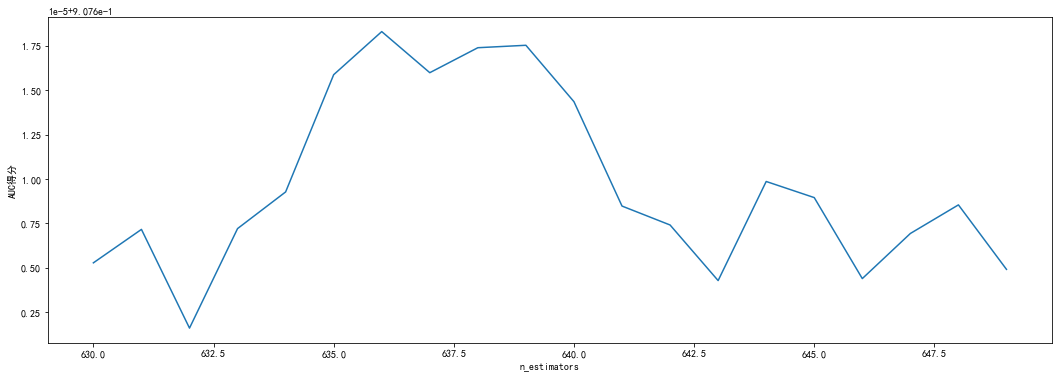

得分最高为： 0.90761831002841 此时的n_estimators为： 636


In [60]:
axisx = range(630,650,1)
rs = []
for i in axisx:
    reg = XGBClassifier(objective= 'binary:logistic',nthread=8,seed=27,learning_rate=0.01,n_estimators=i)
    rs.append(cross_val_score(reg,Xtrain,Ytrain,cv=kfold,scoring="roc_auc").mean())
plt.figure(figsize = (18, 6))
plt.plot(range(630,650,1), rs)
plt.xlabel('n_estimators')
plt.ylabel('AUC得分')
plt.show()
print('得分最高为：', max(rs), '此时的n_estimators为：', axisx[rs.index(max(rs))])

#### 调max_depth、min_child_weight

In [64]:
#其他参数设置为默认值
model2 = XGBClassifier(objective= 'binary:logistic',nthread=8,seed=27,learning_rate=0.01,n_estimators=636)

max_depth = [3, 5, 6, 7, 9, 12, 15, 17, 25]
min_child_weight = [1, 3, 5, 7]
param2 = dict(max_depth=max_depth, min_child_weight=min_child_weight)
# k折交叉验证
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

#网格搜索类，要求的param_grid参数，必须是字典，或者字典构成的列表
grid_search = GridSearchCV(model2, param_grid=param2, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(Xtrain, Ytrain)

print("最高得分: %f 参数 %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
最高得分: 0.907618 参数 {'max_depth': 6, 'min_child_weight': 1}


In [65]:
# 查看此时的模型效果
model = XGBClassifier(objective= 'binary:logistic',nthread=8,seed=27,learning_rate=0.01,n_estimators=636,
                     max_depth=6,min_child_weight=1)
cv_score_train_test(model)

       accuracy        f1   roc_auc
Train  0.828728  0.724649  0.907618
Test   0.837256  0.741509  0.908683


#### 调gamma

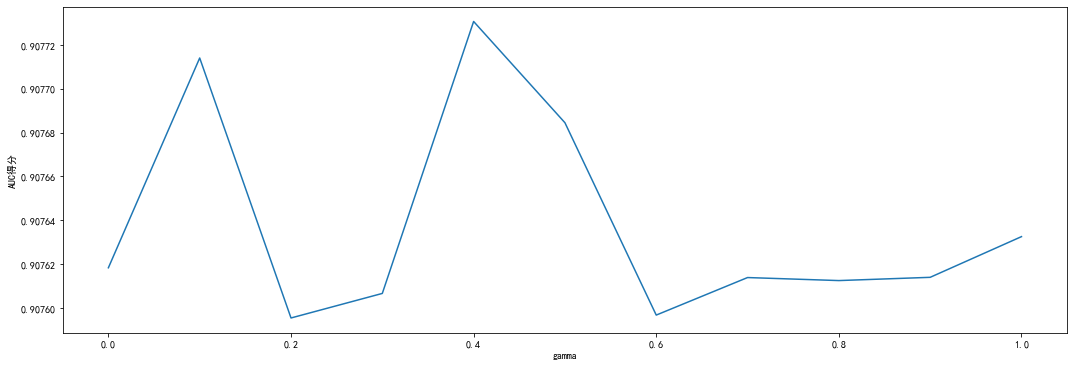

得分最高为： 0.9077307397952351 此时的gamma为： 0.4


In [66]:
axisx = np.linspace(0, 1, 11)
rs = []
for i in axisx:
    reg = XGBClassifier(objective= 'binary:logistic',nthread=8,seed=27,learning_rate=0.01,n_estimators=636,
                     max_depth=6,min_child_weight=1,gamma=i)
    rs.append(cross_val_score(reg,Xtrain,Ytrain,cv=kfold,scoring="roc_auc").mean())
plt.figure(figsize = (18, 6))
plt.plot(axisx, rs)
plt.xlabel('gamma')
plt.ylabel('AUC得分')
plt.show()
print('得分最高为：', max(rs), '此时的gamma为：', axisx[rs.index(max(rs))])

In [67]:
# 查看此时的模型效果
model = XGBClassifier(objective= 'binary:logistic',nthread=8,seed=27,learning_rate=0.01,n_estimators=636,
                     max_depth=6,min_child_weight=1,gamma=0.4)
cv_score_train_test(model)

       accuracy        f1   roc_auc
Train  0.828461  0.724612  0.907731
Test   0.836738  0.741374  0.908651


#### 调subsample、colsample_bytree

In [68]:
model4 = XGBClassifier(objective= 'binary:logistic',nthread=8,seed=27,learning_rate=0.01,n_estimators=636,
                     max_depth=6,min_child_weight=1,gamma=0.4)

subsample = [ i/10.0 for i in range(6, 11)]
colsample_bytree  =  [ i/10.0 for i in range(6, 11)]
param4 = dict(subsample=subsample, colsample_bytree=colsample_bytree)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

#网格搜索类，要求的param_grid参数，必须是字典，或者字典构成的列表
grid_search = GridSearchCV(model4, param_grid=param4, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(Xtrain, Ytrain)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best: 0.908627 using {'colsample_bytree': 0.9, 'subsample': 0.8}


In [69]:
colsample_bytree  =  [ i/100.0 for i in range(80,101,5)]
subsample = [ i/100.0 for i in range(70,91,5)]
param4_2 = dict(subsample=subsample, colsample_bytree=colsample_bytree)

grid_search = GridSearchCV(model4, param_grid=param4_2, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(Xtrain, Ytrain)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best: 0.908662 using {'colsample_bytree': 0.95, 'subsample': 0.8}


In [70]:
model = XGBClassifier(objective= 'binary:logistic',nthread=8,seed=27,learning_rate=0.01,n_estimators=636,
                     max_depth=6,min_child_weight=1,gamma=0.4,colsample_bytree=0.95,subsample=0.8)
cv_score_train_test(model)

       accuracy        f1   roc_auc
Train  0.831260  0.728538  0.908662
Test   0.837463  0.741393  0.909552


#### 调正则化参数reg_alpha、reg_lambda

In [71]:
model5 = XGBClassifier(objective= 'binary:logistic',nthread=8,seed=27,learning_rate=0.01,n_estimators=636,
                     max_depth=6,min_child_weight=1,gamma=0.4,colsample_bytree=0.95,subsample=0.8)

reg_alpha = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,1]
reg_lambda  =  [0,0.1,0.5,1]
param5 = dict(reg_alpha=reg_alpha, reg_lambda=reg_lambda)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

#网格搜索类，要求的param_grid参数，必须是字典，或者字典构成的列表
grid_search = GridSearchCV(model5, param_grid=param5, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(Xtrain, Ytrain)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best: 0.908713 using {'reg_alpha': 0.09, 'reg_lambda': 1}


In [72]:
model = XGBClassifier(objective= 'binary:logistic',nthread=8,seed=27,learning_rate=0.01,n_estimators=636,
                     max_depth=6,min_child_weight=1,gamma=0.4,colsample_bytree=0.95,subsample=0.8,
                     reg_alpha=0.09,reg_lambda=1)
cv_score_train_test(model)

       accuracy        f1   roc_auc
Train  0.831393  0.729001  0.908713
Test   0.837981  0.742366  0.909381


#### 重新调整learning_rate

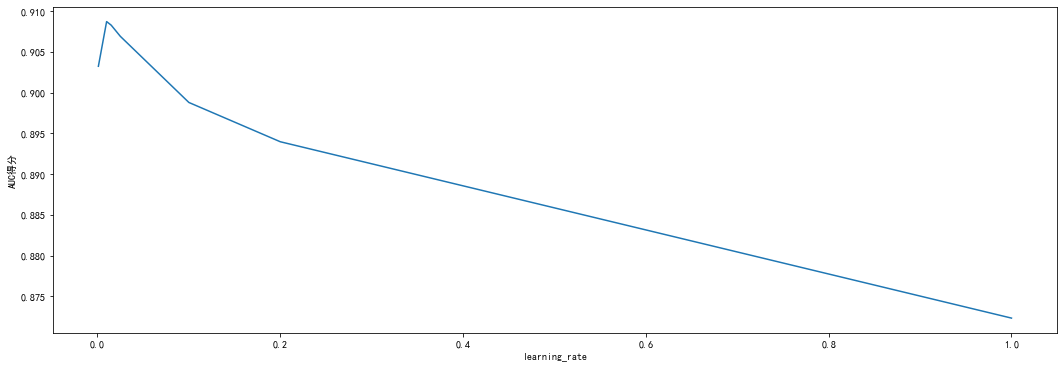

得分最高为： 0.908713379718358 此时的learning_rate为： 0.01


In [73]:
axisx = [0.001, 0.01, 0.015, 0.025, 0.1, 0.2, 1]
rs = []
for i in axisx:
    reg = XGBClassifier(objective= 'binary:logistic',nthread=8,seed=27,learning_rate=i,n_estimators=636,
                     max_depth=6,min_child_weight=1,gamma=0.4,colsample_bytree=0.95,subsample=0.8,
                     reg_alpha=0.09,reg_lambda=1)
    rs.append(cross_val_score(reg,Xtrain,Ytrain,cv=kfold,scoring="roc_auc").mean())
plt.figure(figsize = (18, 6))
plt.plot(axisx, rs)
plt.xlabel('learning_rate')
plt.ylabel('AUC得分')
plt.show()
print('得分最高为：', max(rs), '此时的learning_rate为：', axisx[rs.index(max(rs))])

### 5.5.3模型评估

In [74]:
final = XGBClassifier(objective= 'binary:logistic',nthread=8,seed=27,learning_rate=0.01,n_estimators=636,
                     max_depth=6,min_child_weight=1,gamma=0.4,colsample_bytree=0.95,subsample=0.8,
                     reg_alpha=0.09,reg_lambda=1)
final.fit(Xtrain, Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.95, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=636, n_jobs=8, nthread=8, num_parallel_tree=1,
              random_state=27, reg_alpha=0.09, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [75]:
y_pred = final.predict(Xtest)
y_presult = [round(value) for value in y_pred]

print('XGBoost模型分类报告')
print("Accuracy:", accuracy_score(Ytest,y_presult))
print("F1 Score:", f1_score(Ytest,y_presult, average='weighted'))
print(classification_report(Ytest, y_presult))

XGBoost模型分类报告
Accuracy: 0.8382916969005909
F1 Score: 0.8373884080196545
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6542
           1       0.76      0.73      0.74      3105

    accuracy                           0.84      9647
   macro avg       0.82      0.81      0.81      9647
weighted avg       0.84      0.84      0.84      9647



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

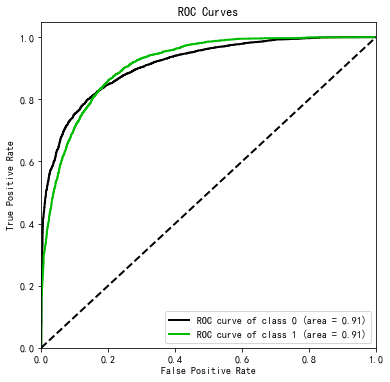

In [76]:
import scikitplot as skplt

vali_proba_df = pd.DataFrame(final.predict_proba(Xtest))
skplt.metrics.plot_roc(Ytest, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

Text(53.0, 0.5, '真实值')

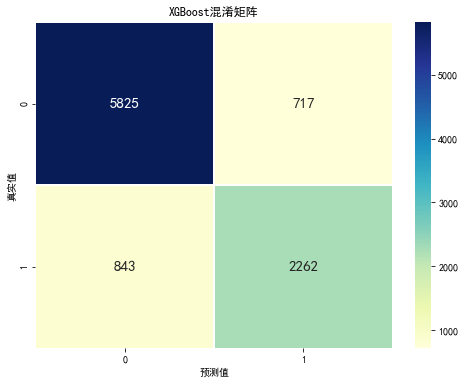

In [77]:
f, ax = plt.subplots(figsize=(8,6))
C = confusion_matrix(Ytest, y_presult, labels=[0, 1])
sns.heatmap(C, annot=True, fmt='.0f',ax=ax, linewidths=.5, cmap="YlGnBu",annot_kws={'size':15})
ax.set_title('XGBoost混淆矩阵')
ax.set_xlabel('预测值')
ax.set_ylabel('真实值')

## 5.6聚类

### 5.6.1带标签的聚类

In [79]:
cluster = KMeans(n_clusters=2,random_state=0).fit(Xtrain)
pre = cluster.fit_predict(Xtrain)

#### 5.6.1.1调整后的兰德指数

In [82]:
metrics.adjusted_rand_score(Ytrain, pre)

0.21312986142616952

#### 5.6.1.2互信息分

#####  普通的互信息分

In [83]:
metrics.mutual_info_score(pre, Ytrain)

0.1302712630293693

##### 调整后的互信息分

In [84]:
metrics.adjusted_mutual_info_score(Ytrain, pre)

0.1974458813712256

##### 标准化的互信息分

In [85]:
metrics.normalized_mutual_info_score(pre, Ytrain)

0.19747290857261038

#### 5.6.1.3V-measure

##### 同质性

In [86]:
metrics.homogeneity_score(Ytrain, pre)

0.20800802358701553

##### 完整性

In [87]:
metrics.completeness_score(Ytrain, pre)

0.18795350742666175

###### 同质性和完整性的调和平均

In [88]:
metrics.v_measure_score(Ytrain, pre)

0.19747290857261038

### 5.6.2不带标签的聚类

#### 5.6.2.1调n_clusters

In [89]:
sas = []
for n_clusters in [2, 3, 4, 5, 6, 7, 8, 9]:
    n_clusters = n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(Xtrain)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(Xtrain, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sas.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.14253856032833223
For n_clusters = 3 The average silhouette_score is : 0.1534713113592456
For n_clusters = 4 The average silhouette_score is : 0.16683806502665877
For n_clusters = 5 The average silhouette_score is : 0.18536513031582805
For n_clusters = 6 The average silhouette_score is : 0.17950069576595426
For n_clusters = 7 The average silhouette_score is : 0.19332058612667108
For n_clusters = 8 The average silhouette_score is : 0.19543282506557877
For n_clusters = 9 The average silhouette_score is : 0.21191677673167553


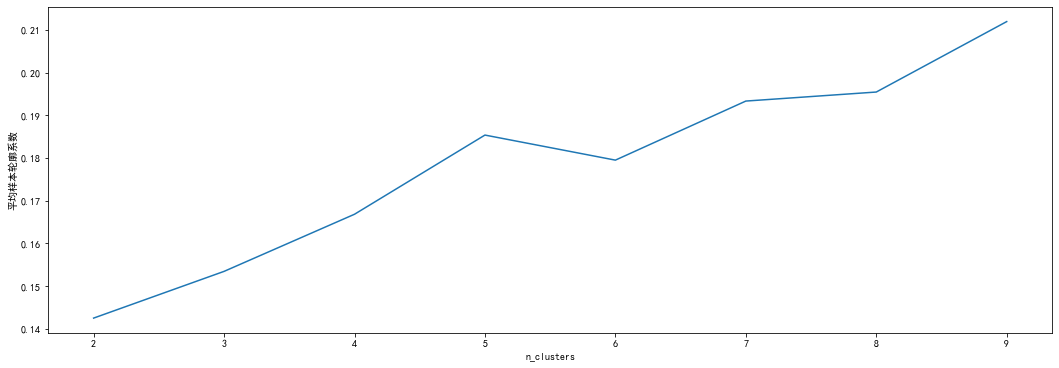

得分最高为： 0.21191677673167553 此时的n_clusters为： 9


In [90]:
plt.figure(figsize = (18, 6))
plt.plot([2,3,4,5,6,7,8,9], sas)
plt.xlabel('n_clusters')
plt.ylabel('平均样本轮廓系数')
plt.show()
print('得分最高为：', max(sas), '此时的n_clusters为：', [2,3,4,5,6,7,8,9][sas.index(max(sas))])

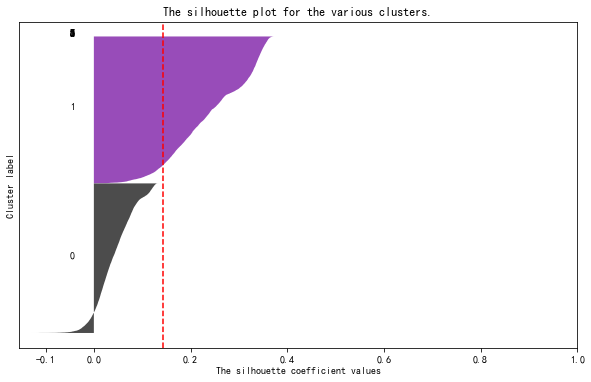

In [93]:
clusterer = KMeans(n_clusters=2, random_state=10).fit(Xtrain)
cluster_labels = clusterer.labels_
sample_silhouette_values = silhouette_samples(Xtrain, cluster_labels)
y_lower = 10
plt.figure(figsize = (10, 6))
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i)/n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),ith_cluster_silhouette_values,facecolor=color,alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.title("The silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.axvline(x=sas[0], color="red", linestyle="--")
plt.yticks([])
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

In [95]:
# 戴维斯-布尔丁指数
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(Xtrain, cluster_labels)

2.62246152339849

For n_clusters = 2 The average silhouette_score is : 0.14253856032833223
For n_clusters = 3 The average silhouette_score is : 0.1534713113592456
For n_clusters = 4 The average silhouette_score is : 0.16683806502665877
For n_clusters = 5 The average silhouette_score is : 0.18536513031582805
For n_clusters = 6 The average silhouette_score is : 0.17950069576595426
For n_clusters = 7 The average silhouette_score is : 0.19332058612667108


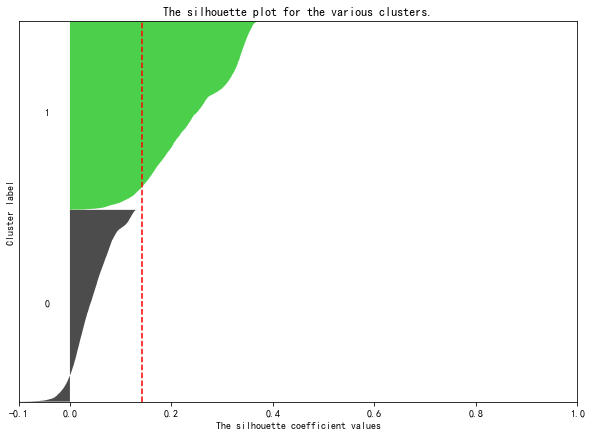

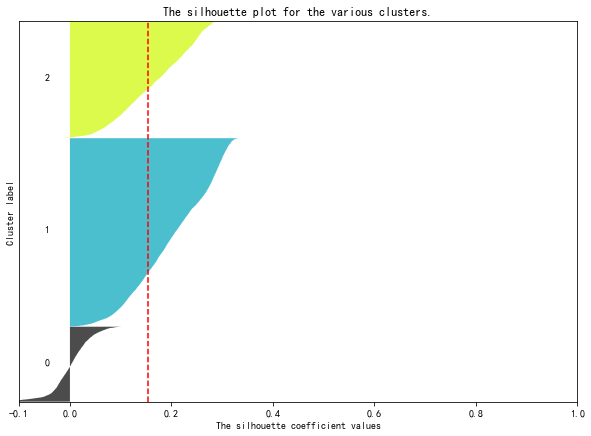

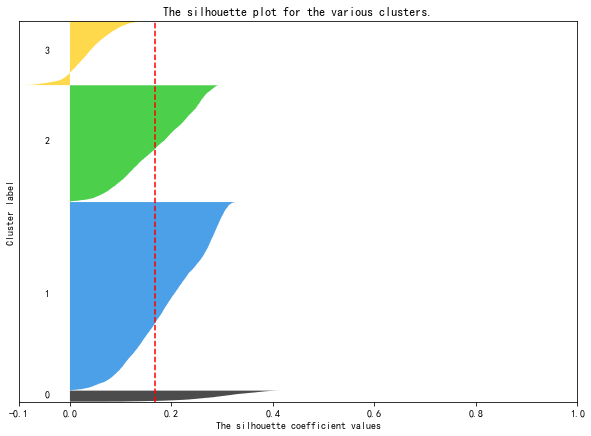

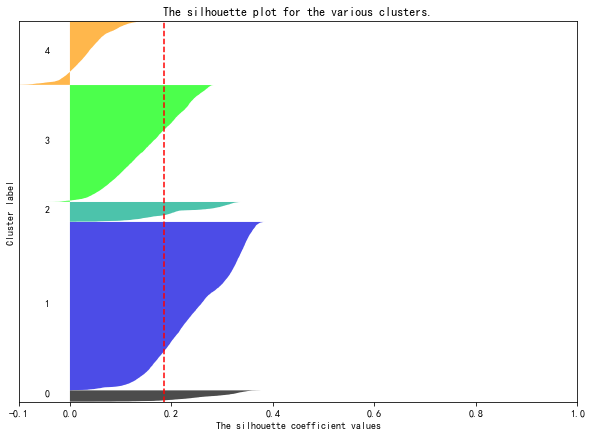

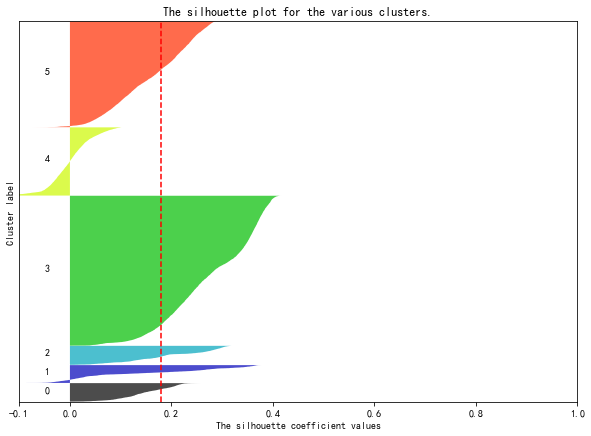

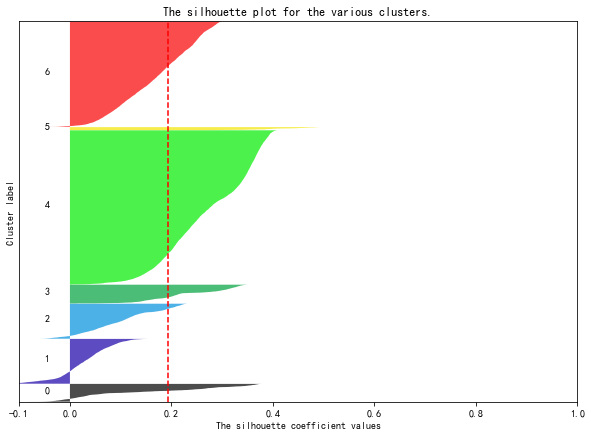

In [96]:
for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, Xtrain.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(Xtrain)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(Xtrain, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(Xtrain, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          ,ith_cluster_silhouette_values
                          ,facecolor=color
                          ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#### 6.5.2.2调初始质心选取参数

In [100]:
plus = KMeans(n_clusters = 2).fit(Xtrain)
print("此时的样本平均轮廓系数：", silhouette_score(Xtrain,plus.labels_))
print("此时迭代的次数为：", plus.n_iter_)

此时的样本平均轮廓系数： 0.14253856032833223
此时迭代的次数为： 11


In [99]:
random = KMeans(n_clusters = 2,init="random",random_state=10).fit(Xtrain)
print("此时的样本平均轮廓系数：", silhouette_score(Xtrain,random.labels_))
print("此时迭代的次数为：", random.n_iter_)

此时的样本平均轮廓系数： 0.14259208223318406
此时迭代的次数为： 6


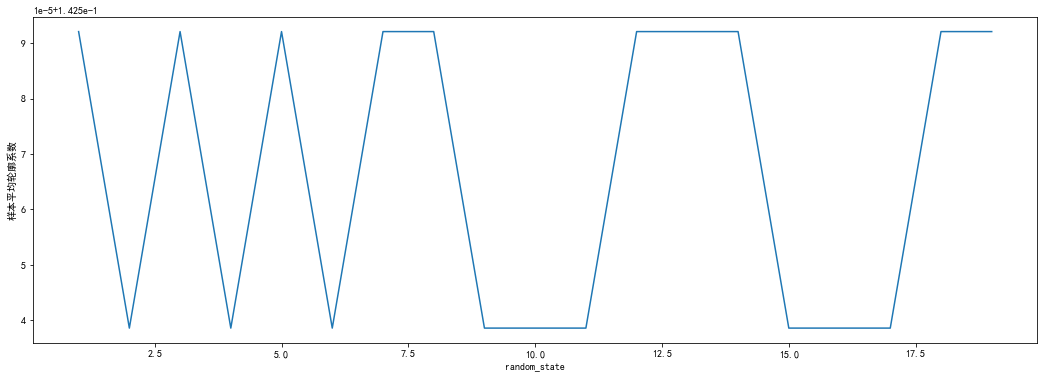

样本平均轮廓系数最高为： 0.14259208223318406 此时的random_state为： 1


In [101]:
score = []
ar = [i for i in range(1, 20)]
for i in ar:
    random = KMeans(n_clusters = 2,random_state=i,n_jobs=-1).fit(Xtrain)
    score.append(silhouette_score(Xtrain,random.labels_))
plt.figure(figsize = (18, 6))
plt.plot(ar, score)
plt.xlabel('random_state')
plt.ylabel('样本平均轮廓系数')
plt.show()
print('样本平均轮廓系数最高为：', max(score), '此时的random_state为：', ar[score.index(max(score))])

#### 6.5.2.3调迭代停止条件

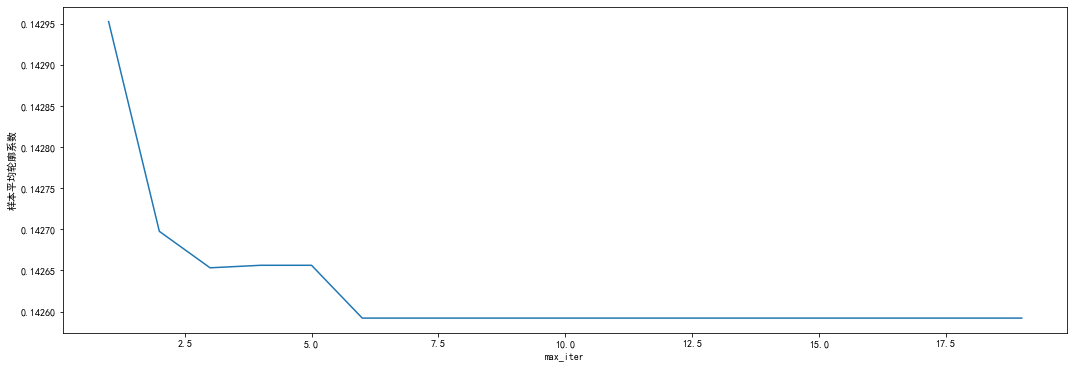

样本平均轮廓系数最高为： 0.14295274063230248 此时的max_iter为： 1


In [102]:
score = []
ar = [i for i in range(1, 20, 1)]
for i in ar:
    random = KMeans(n_clusters = 2,random_state=1,n_jobs=-1,max_iter=i).fit(Xtrain)
    score.append(silhouette_score(Xtrain,random.labels_))
plt.figure(figsize = (18, 6))
plt.plot(ar, score)
plt.xlabel('max_iter')
plt.ylabel('样本平均轮廓系数')
plt.show()
print('样本平均轮廓系数最高为：', max(score), '此时的max_iter为：', ar[score.index(max(score))])

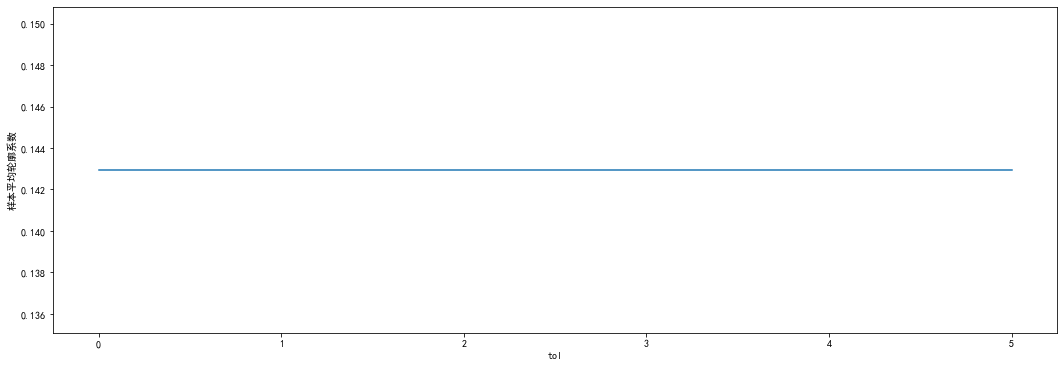

样本平均轮廓系数最高为： 0.14295274063230248 此时的tol为： 0.0001


In [103]:
score = []
ar = [0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5]
for i in ar:
    random = KMeans(n_clusters = 2,random_state=1,n_jobs=-1,max_iter=1,tol=i).fit(Xtrain)
    score.append(silhouette_score(Xtrain,random.labels_))
plt.figure(figsize = (18, 6))
plt.plot(ar, score)
plt.xlabel('tol')
plt.ylabel('样本平均轮廓系数')
plt.show()
print('样本平均轮廓系数最高为：', max(score), '此时的tol为：', ar[score.index(max(score))])

#### 6.5.2.4聚类结果“验证”

In [43]:
clf = KMeans(n_clusters = 2,random_state=1,n_jobs=-1,max_iter=1,tol=0.0001)
result = clf.fit(Xtrain).labels_
print("准确度：",accuracy_score(Ytrain, result))
print("AUC得分：",roc_auc_score(Ytrain, result))

准确度： 0.7293851075173272
AUC得分： 0.7629941999126124


Text(53.0, 0.5, '真实值')

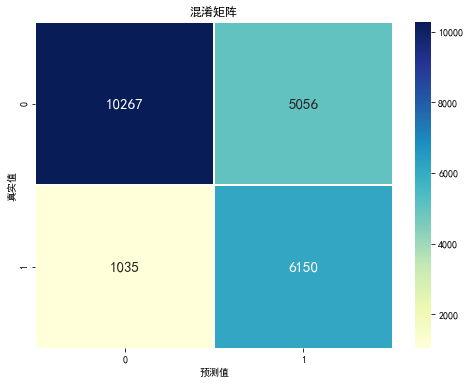

In [110]:
f, ax = plt.subplots(figsize=(8,6))
C = confusion_matrix(Ytrain.values.tolist(), result.tolist(), labels=[0, 1])
sns.heatmap(C, annot=True, fmt='.0f',ax=ax, linewidths=.5, cmap="YlGnBu",annot_kws={'size':15})
ax.set_title('混淆矩阵')
ax.set_xlabel('预测值')
ax.set_ylabel('真实值')

## 5.7 LGBM

### 5.7.1初始模型评估

In [3]:
def cv_score_train_test(model):
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
    score_list = ["accuracy","f1", "roc_auc"]
    train_scores = []
    test_scores = []
    for score in score_list:
        train_scores.append(cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring=score).mean())
        test_scores.append(cross_val_score(model, Xtest, Ytest, cv=kfold, scoring=score).mean())
    scores = np.array((train_scores + test_scores)).reshape(2, -1)
    scores_df = pd.DataFrame(scores, index=['Train', 'Test'], columns=score_list)
    print(scores_df)

In [4]:
import lightgbm as lgb

In [35]:
#未进行调参时的模型
model = lgb.LGBMClassifier(seed=27)
model.fit(Xtrain, Ytrain)

LGBMClassifier(seed=27)

In [36]:
y_pred_origin = model.predict(Xtest)
y_pre_origin = [round(value) for value in y_pred_origin]

print('LGBM分类报告')
print("Accuracy:", accuracy_score(Ytest,y_pre_origin))
print("F1 Score:", f1_score(Ytest,y_pre_origin, average='weighted'))
print(classification_report(Ytest, y_pre_origin))

LGBM分类报告
Accuracy: 0.8358038768529077
F1 Score: 0.8347795033341693
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6542
           1       0.76      0.72      0.74      3105

    accuracy                           0.84      9647
   macro avg       0.81      0.81      0.81      9647
weighted avg       0.83      0.84      0.83      9647



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

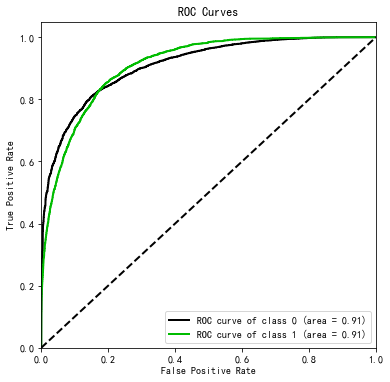

In [7]:
vali_proba_df = pd.DataFrame(model.predict_proba(Xtest))
skplt.metrics.plot_roc(Ytest, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

In [8]:
# 查看此时的模型效果
cv_score_train_test(model)

       accuracy        f1   roc_auc
Train  0.829038  0.726832  0.905953
Test   0.833316  0.735601  0.905878


In [9]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'seed': 27}

### 5.7.2模型调参

#### 5.7.2.1 调n_estimators，初步调learning_rate

In [17]:
#其他参数设置为默认值
model1_1 = lgb.LGBMClassifier(objective= 'binary',seed=27)
#网格搜索参数列表
learning_rate = [0.001, 0.01, 0.1, 0.2]
n_estimators = [100, 200, 300, 500, 1000, 1500]
param1 = dict(learning_rate=learning_rate, n_estimators=n_estimators)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

#网格搜索类，要求的param_grid参数，必须是字典，或者字典构成的列表

grid_search = GridSearchCV(model1_1, param_grid=param1, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(Xtrain, Ytrain)

print("最高得分: %f 参数 %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
最高得分: 0.907445 参数 {'learning_rate': 0.01, 'n_estimators': 500}


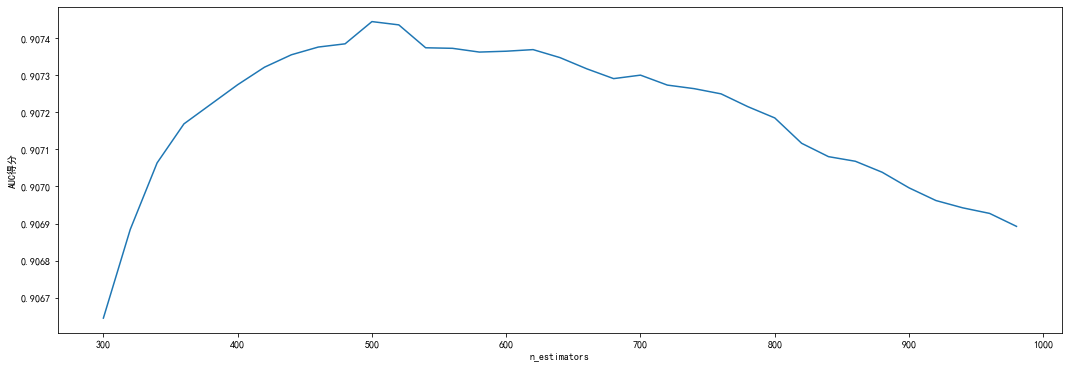

得分最高为： 0.9074451355033322 此时的n_estimators为： 500


In [18]:
axisx = range(300, 1000, 20)
rs = []
for i in axisx:
    reg = lgb.LGBMClassifier(objective= 'binary',seed=27,learning_rate=0.01,n_estimators=i)
    rs.append(cross_val_score(reg,Xtrain,Ytrain,cv=kfold,scoring="roc_auc").mean())
plt.figure(figsize = (18, 6))
plt.plot(range(300, 1000, 20), rs)
plt.xlabel('n_estimators')
plt.ylabel('AUC得分')
plt.show()
print('得分最高为：', max(rs), '此时的n_estimators为：', axisx[rs.index(max(rs))])

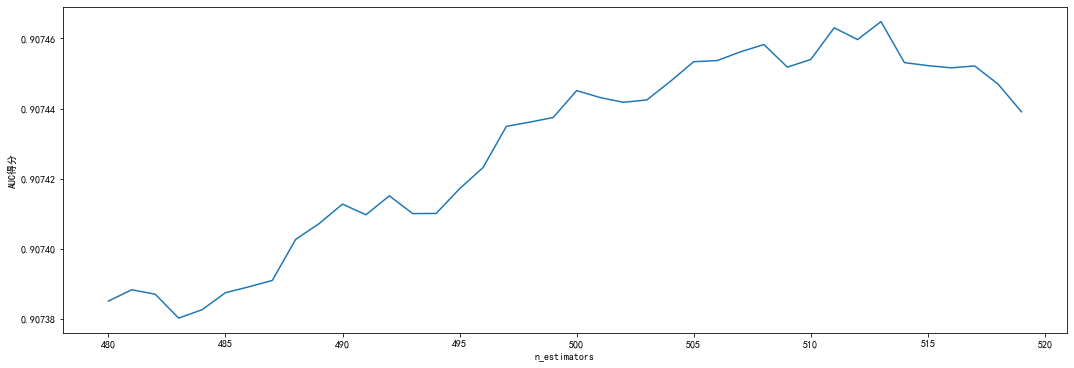

得分最高为： 0.9074648221644637 此时的n_estimators为： 513


In [19]:
axisx = range(480, 520, 1)
rs = []
for i in axisx:
    reg = lgb.LGBMClassifier(objective= 'binary',seed=27,learning_rate=0.01,n_estimators=i)
    rs.append(cross_val_score(reg,Xtrain,Ytrain,cv=kfold,scoring="roc_auc").mean())
plt.figure(figsize = (18, 6))
plt.plot(range(480, 520, 1), rs)
plt.xlabel('n_estimators')
plt.ylabel('AUC得分')
plt.show()
print('得分最高为：', max(rs), '此时的n_estimators为：', axisx[rs.index(max(rs))])

#### 5.7.2.2调max_depth、num_leaves

In [20]:
#其他参数设置为默认值
model1_1 = lgb.LGBMClassifier(objective= 'binary',seed=27,learning_rate=0.01,n_estimators=513)

param1 = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'num_leaves': list(range(20, 160, 20)),
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

#网格搜索类，要求的param_grid参数，必须是字典，或者字典构成的列表
grid_search = GridSearchCV(model1_1, param_grid=param1, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(Xtrain, Ytrain)

print("最高得分: %f 参数 %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 63 candidates, totalling 315 fits
最高得分: 0.907565 参数 {'max_depth': 9, 'num_leaves': 40}


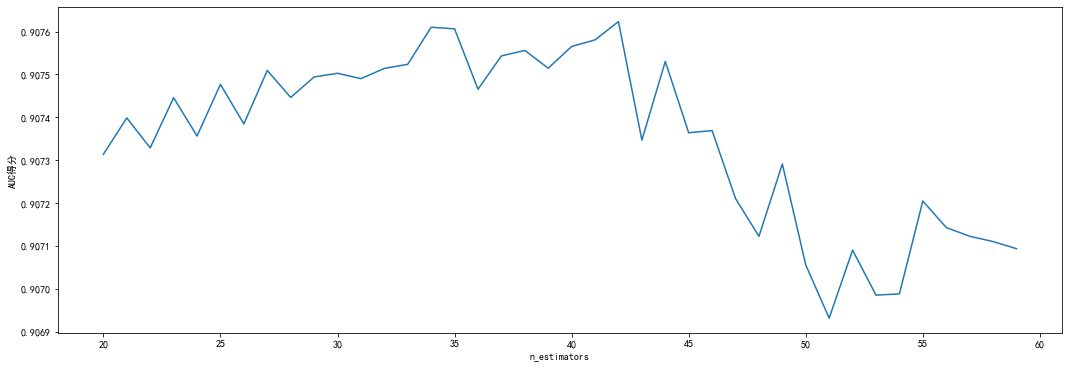

得分最高为： 0.9076232208638336 此时的num_leaves为： 42


In [21]:
axisx = range(20, 60, 1)
rs = []
for i in axisx:
    reg = lgb.LGBMClassifier(objective= 'binary',seed=27,learning_rate=0.01,n_estimators=513,max_depth=9,num_leaves=i)
    rs.append(cross_val_score(reg,Xtrain,Ytrain,cv=kfold,scoring="roc_auc").mean())
plt.figure(figsize = (18, 6))
plt.plot(range(20, 60, 1), rs)
plt.xlabel('n_estimators')
plt.ylabel('AUC得分')
plt.show()
print('得分最高为：', max(rs), '此时的num_leaves为：', axisx[rs.index(max(rs))])

#### 5.7.2.3调max_bin、min_data_in_leaf

In [22]:
#其他参数设置为默认值
model1_1 = lgb.LGBMClassifier(objective= 'binary',seed=27,learning_rate=0.01,n_estimators=513,max_depth=9,num_leaves=42)

param1 = {
    'max_bin': range(5,256,10), 
    'min_data_in_leaf':range(1,102,10)
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

#网格搜索类，要求的param_grid参数，必须是字典，或者字典构成的列表
grid_search = GridSearchCV(model1_1, param_grid=param1, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(Xtrain, Ytrain)

print("最高得分: %f 参数 %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 286 candidates, totalling 1430 fits
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
最高得分: 0.907965 参数 {'max_bin': 215, 'min_data_in_leaf': 31}


In [23]:
#其他参数设置为默认值
model1_1 = lgb.LGBMClassifier(objective= 'binary',seed=27,learning_rate=0.01,n_estimators=513,max_depth=9,num_leaves=42)

param1 = {
    'max_bin': range(205,225,1), 
    'min_data_in_leaf':range(21,41,1)
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

#网格搜索类，要求的param_grid参数，必须是字典，或者字典构成的列表
grid_search = GridSearchCV(model1_1, param_grid=param1, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(Xtrain, Ytrain)

print("最高得分: %f 参数 %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
最高得分: 0.907965 参数 {'max_bin': 215, 'min_data_in_leaf': 31}


#### 5.7.2.4调feature_fraction、bagging_fraction、bagging_freq

In [25]:
#其他参数设置为默认值
model1_1 = lgb.LGBMClassifier(objective= 'binary',seed=27,learning_rate=0.01,n_estimators=513,max_depth=9,num_leaves=42,
                             max_bin=215,min_data_in_leaf=31)

param1 = {
    'feature_fraction': [0.6,0.7,0.8,0.9,1.0],
    'bagging_fraction': [0.6,0.7,0.8,0.9,1.0],
    'bagging_freq': range(0,81,10)
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

#网格搜索类，要求的param_grid参数，必须是字典，或者字典构成的列表
grid_search = GridSearchCV(model1_1, param_grid=param1, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(Xtrain, Ytrain)

print("最高得分: %f 参数 %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
最高得分: 0.908411 参数 {'bagging_fraction': 0.9, 'bagging_freq': 40, 'feature_fraction': 0.8}


#### 5.7.2.5调正则化参数

In [27]:
#其他参数设置为默认值
model1_1 = lgb.LGBMClassifier(objective= 'binary',seed=27,learning_rate=0.01,n_estimators=513,max_depth=9,num_leaves=42,
                             max_bin=215,min_data_in_leaf=31,bagging_fraction=0.9,bagging_freq=40,feature_fraction=0.8)

param1 = {
    'lambda_l1': [1e-5,1e-3,1e-1,0.0,0.1,0.3,0.5,0.7,0.9,1.0],
    'lambda_l2': [1e-5,1e-3,1e-1,0.0,0.1,0.3,0.5,0.7,0.9,1.0]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

#网格搜索类，要求的param_grid参数，必须是字典，或者字典构成的列表
grid_search = GridSearchCV(model1_1, param_grid=param1, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(Xtrain, Ytrain)

print("最高得分: %f 参数 %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
最高得分: 0.908412 参数 {'lambda_l1': 0.0, 'lambda_l2': 1e-05}


#### 5.7.2.6重新调整learning_rate

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=1e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1e-05
[LightGBM] [Warning] bagging_freq is set=40, subsample_freq=0 will be ignored. Current value: bagging_freq=40
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignor

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=1e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1e-05
[LightGBM] [Warning] bagging_freq is set=40, subsample_freq=0 will be ignored. Current value: bagging_freq=40
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignor

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=1e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1e-05
[LightGBM] [Warning] bagging_freq is set=40, subsample_freq=0 will be ignored. Current value: bagging_freq=40
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignor

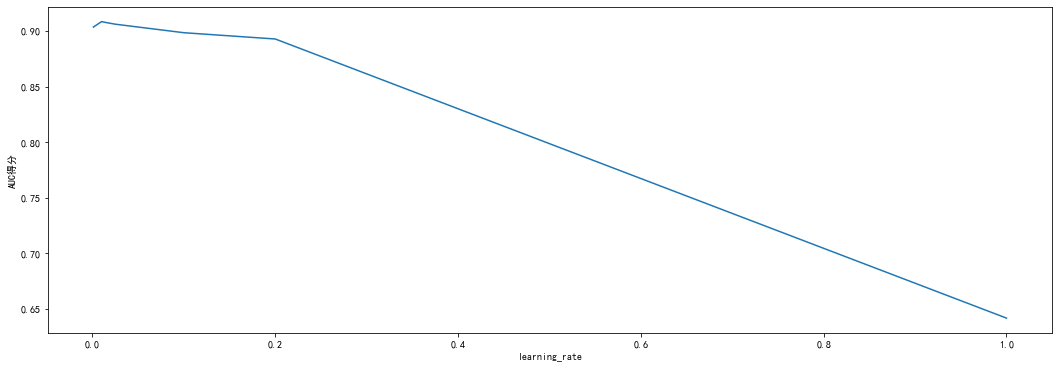

得分最高为： 0.9084117038338396 此时的learning_rate为： 0.01


In [29]:
axisx = [0.001, 0.01, 0.015, 0.025, 0.1, 0.2, 1]
rs = []
for i in axisx:
    reg = lgb.LGBMClassifier(objective= 'binary',seed=27,learning_rate=i,n_estimators=513,max_depth=9,num_leaves=42,
                             max_bin=215,min_data_in_leaf=31,bagging_fraction=0.9,bagging_freq=40,feature_fraction=0.8,
                            lambda_l1=0.0, lambda_l2=1e-05)
    rs.append(cross_val_score(reg,Xtrain,Ytrain,cv=kfold,scoring="roc_auc").mean())
plt.figure(figsize = (18, 6))
plt.plot(axisx, rs)
plt.xlabel('learning_rate')
plt.ylabel('AUC得分')
plt.show()
print('得分最高为：', max(rs), '此时的learning_rate为：', axisx[rs.index(max(rs))])

### 5.7.3 模型评估

In [30]:
final = lgb.LGBMClassifier(objective= 'binary',seed=27,learning_rate=0.01,n_estimators=513,max_depth=9,num_leaves=42,
                             max_bin=215,min_data_in_leaf=31,bagging_fraction=0.9,bagging_freq=40,feature_fraction=0.8,
                            lambda_l1=0.0, lambda_l2=1e-05)
final.fit(Xtrain, Ytrain)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=1e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1e-05
[LightGBM] [Warning] bagging_freq is set=40, subsample_freq=0 will be ignored. Current value: bagging_freq=40


LGBMClassifier(bagging_fraction=0.9, bagging_freq=40, feature_fraction=0.8,
               lambda_l1=0.0, lambda_l2=1e-05, learning_rate=0.01, max_bin=215,
               max_depth=9, min_data_in_leaf=31, n_estimators=513,
               num_leaves=42, objective='binary', seed=27)

In [58]:
y_pred = final.predict(Xtest)
y_presult = [round(value) for value in y_pred]

print('LGBM模型分类报告')
print("Accuracy:", accuracy_score(Ytest,y_presult))
print("F1 Score:", f1_score(Ytest,y_presult, 1average='weighted'))
print(classification_report(Ytest, y_presult))

LGBM模型分类报告
Accuracy: 0.8381880377319374
F1 Score: 0.8370488458269364
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6542
           1       0.76      0.72      0.74      3105

    accuracy                           0.84      9647
   macro avg       0.82      0.81      0.81      9647
weighted avg       0.84      0.84      0.84      9647


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

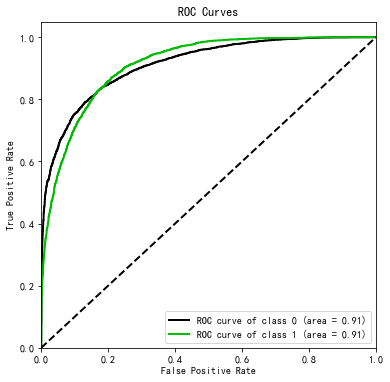

In [32]:
import scikitplot as skplt

vali_proba_df = pd.DataFrame(final.predict_proba(Xtest))
skplt.metrics.plot_roc(Ytest, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

Text(53.0, 0.5, '真实值')

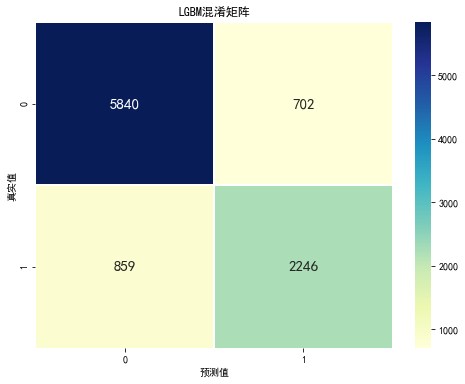

In [34]:
f, ax = plt.subplots(figsize=(8,6))
C = confusion_matrix(Ytest, y_presult, labels=[0, 1])
sns.heatmap(C, annot=True, fmt='.0f',ax=ax, linewidths=.5, cmap="YlGnBu",annot_kws={'size':15})
ax.set_title('LGBM混淆矩阵')
ax.set_xlabel('预测值')
ax.set_ylabel('真实值')

## 5.8模型融合

### 5.8.1Boosting融合

In [52]:
def boosting(num, data1, labels1, clf, data2):
    x_train, x_test, y_train, y_test = train_test_split(data1, labels1, test_size=0.3)
    w = np.ones(len(x_train)) / len(x_train) 
    max_acc = 0 
    result_alpha = 0 
    best_w = np.zeros(len(x_train)) 
    for i in range(num):
        clf.fit(x_train, y_train, sample_weight=w)
        pre0 = clf.predict(x_train)
        pre1 = clf.predict(x_test)
        tt = y_train.values.reshape((1, len(y_train)))[0]
        miss = [int(t) for t in (pre0 != tt)]
        acc = roc_auc_score(y_test, pre1)
        alpha = 0.5*(np.log((acc)/(1-acc)))
        w = np.multiply(w,np.exp([-alpha * s for s in miss]))
        if acc > max_acc:
            max_acc = acc
            result_alpha = alpha
            best_w = w
    clf.fit(x_train, y_train, sample_weight=best_w)
    pre = clf.predict(data2)
    return result_alpha, pre

In [32]:
for i in range(200):
    a1, p1= boosting(i+1, Xtrain, Ytrain, RFC, Xtest)
    a2, p2= boosting(i+1, Xtrain, Ytrain, LR, Xtest)
    a3, p3= boosting(i+1, Xtrain, Ytrain, CCC, Xtest)
    alp1 = a1 / (a1+a2+a3)
    alp2 = a2 / (a1+a2+a3)
    alp3 = a3 / (a1+a2+a3)
    pre = np.round(alp1*p1 + alp2*p2 + alp3*p3)
    acc = roc_auc_score(Ytest, pre)
    y.append(acc)
    if (i+1 == 40) | (i+1 == 80) | (i+1 == 120) | (i+1 == 160) | (i+1 == 200):
        print(i+1, ":", acc)

40 : 0.8051023161269937
80 : 0.8048902382395792
120 : 0.8081404242326253
160 : 0.8044657129910784
200 : 0.8061458821962264


### 5.8.2排序平均融合

In [33]:
rfc_pre_pro = RFC.fit(Xtrain, Ytrain).predict_proba(Xtest)
lr_pre_pro = LR.fit(Xtrain, Ytrain).predict_proba(Xtest)
ccc_pre_pro = CCC.fit(Xtrain, Ytrain).predict_proba(Xtest)

# id:概率
dic_rfc = {}
for i in range(len(rfc_pre_pro)):
    dic_rfc[i] = rfc_pre_pro[i][1]
dic_lr = {}
for i in range(len(lr_pre_pro)):
    dic_lr[i] = lr_pre_pro[i][1]
dic_ccc = {}
for i in range(len(ccc_pre_pro)):
    dic_ccc[i] = ccc_pre_pro[i][1]
# id:概率
res_rfc = sorted(dic_rfc.items(), key=operator.itemgetter(1))
res_lr = sorted(dic_lr.items(), key=operator.itemgetter(1))
res_ccc = sorted(dic_ccc.items(), key=operator.itemgetter(1))
# id:排名
rfc_rank = {}
for i in range(9647):
    rfc_rank[res_rfc[i][0]] = i
lr_rank = {}
for i in range(9647):
    lr_rank[res_lr[i][0]] = i
ccc_rank = {}
for i in range(9647):
    ccc_rank[res_ccc[i][0]] = i
rfc_rank = sorted(rfc_rank.items(), key=operator.itemgetter(0))
lr_rank = sorted(lr_rank.items(), key=operator.itemgetter(0))
ccc_rank = sorted(ccc_rank.items(), key=operator.itemgetter(0))
for i in range(9647):
    rfc_rank[i] = rfc_rank[i][1] / 9647
for i in range(9647):
    lr_rank[i] = lr_rank[i][1] / 9647
for i in range(9647):
    ccc_rank[i] = ccc_rank[i][1] / 9647
res_sc = []
for i in range(9647):
    t = (rfc_rank[i] + lr_rank[i] + ccc_rank[i]) / 3
    res_sc.append([1 - t, t])
pre = []
for i in range(9647):
    if res_sc[i][0] < 0.5:
        pre.append(1)
    else:
        pre.append(0)
        
roc_auc_score(Ytest, pre)

0.8089991549398187


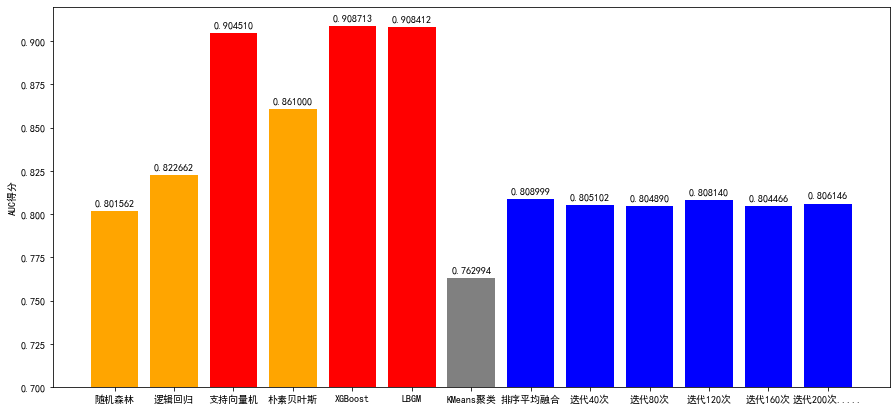

In [44]:
x = ['随机森林','逻辑回归','支持向量机','朴素贝叶斯','XGBoost','LBGM','KMeans聚类','排序平均融合',
     '迭代40次','迭代80次','迭代120次','迭代160次','迭代200次.....',]
scores = [0.8015619123449028,0.8226621454912438,0.9045095788758798,0.8609999652202117,
     0.908713379718358,0.9084117038338396,0.7629941999126124,0.8089991549398187,0.8051023161269937,0.8048902382395792,
     0.8081404242326253,0.8044657129910784,0.8061458821962264]
plt.figure(figsize = (15, 7))
plt.bar(x, scores, color=['orange','orange','r','orange','r','r','gray','b','b','b','b','b','b'])  
plt.ylabel("AUC得分")
plt.ylim(ymax = 0.92)
plt.ylim(ymin = 0.70)
for x, y in enumerate(scores):
    plt.text(x,y+0.003,'{:.6f}'.format(y),ha='center')

## 5.9神经网络

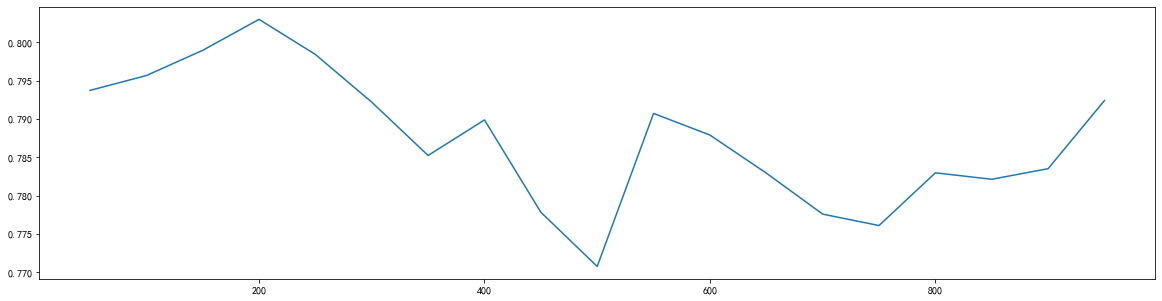

最高得分为： 0.8030199398536274 此时的隐藏层数量为： 200


In [6]:
s = []
for i in range(50,1000,50):
    dnn = DNN(hidden_layer_sizes=(int(i),),random_state=100).fit(Xtrain,Ytrain)
    ras = roc_auc_score(Ytest, dnn.predict(Xtest))
    s.append(ras)
plt.figure(figsize=(20,5))
plt.plot(range(50,1000,50),s)
plt.show()
print('最高得分为：', max(s), '此时的隐藏层数量为：', range(50,1000,50)[s.index(max(s))])

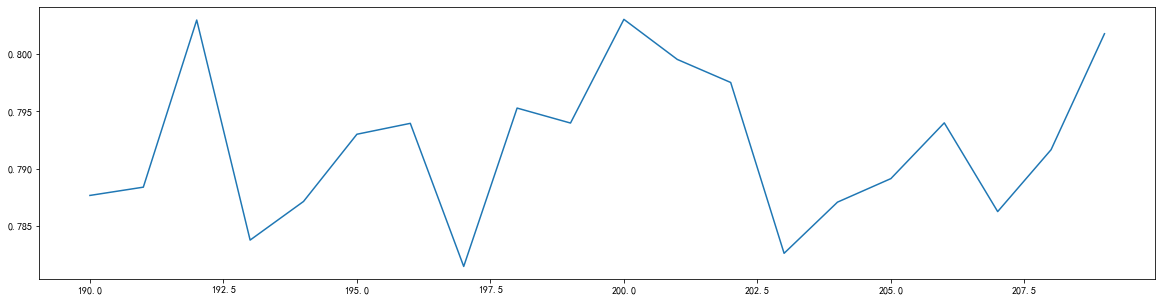

最高得分为： 0.8030199398536274 此时的隐藏层数量为： 200


In [7]:
s = []
for i in range(190,210,1):
    dnn = DNN(hidden_layer_sizes=(int(i),),random_state=100).fit(Xtrain,Ytrain)
    ras = roc_auc_score(Ytest, dnn.predict(Xtest))
    s.append(ras)
plt.figure(figsize=(20,5))
plt.plot(range(190,210,1),s)
plt.show()
print('最高得分为：', max(s), '此时的隐藏层数量为：', range(190,210,1)[s.index(max(s))])

In [21]:
for i in ['adam', 'sgd', 'lbfgs']:
    for j in ['identity', 'logistic', 'tanh', 'relu']:
        dnn = DNN(hidden_layer_sizes=(200,),random_state=100, solver=i, activation=j).fit(Xtrain,Ytrain)
        ras = roc_auc_score(Ytest, dnn.predict(Xtest))
        print("solver:", i, "activation:", j, "auc:", ras)

solver: adam activation: identity auc: 0.7863548052711185
solver: adam activation: logistic auc: 0.8098604739332383
solver: adam activation: tanh auc: 0.7976823754063348
solver: adam activation: relu auc: 0.8030199398536274
solver: sgd activation: identity auc: 0.7837753617812294
solver: sgd activation: logistic auc: 0.7864397842155527
solver: sgd activation: tanh auc: 0.785234856678207
solver: sgd activation: relu auc: 0.7969118011171504
solver: lbfgs activation: identity auc: 0.7839874396686443
solver: lbfgs activation: logistic auc: 0.78656614421119
solver: lbfgs activation: tanh auc: 0.781550686910671
solver: lbfgs activation: relu auc: 0.7787332531132098


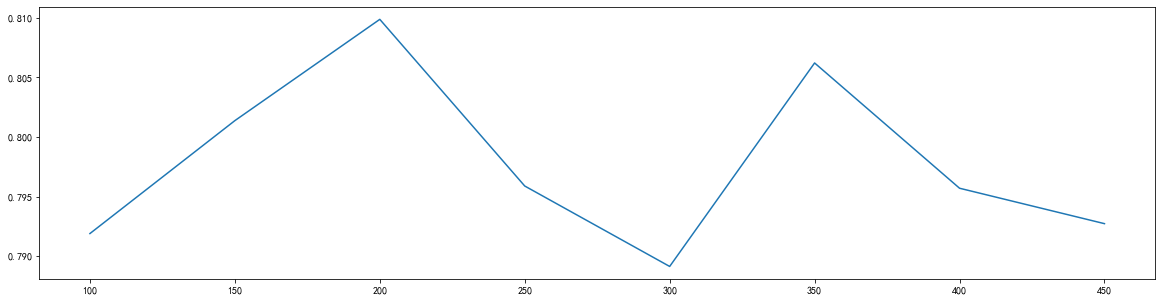

最高得分为： 0.8098604739332383 此时的max_iter为： 200


In [27]:
s = []
for i in range(100,500,50):
    dnn = DNN(hidden_layer_sizes=(200,),random_state=100, solver='adam', activation='logistic', max_iter=i).fit(Xtrain,Ytrain)
    ras = roc_auc_score(Ytest, dnn.predict(Xtest))
    s.append(ras)
plt.figure(figsize=(20,5))
plt.plot(range(100,500,50),s)
plt.show()
print('最高得分为：', max(s), '此时的max_iter为：', range(100,500,50)[s.index(max(s))])